# **Moniqo Group Project**

### **Data Cleaning** 



***Data description:*** entire journey of a microfinance customer 
- **LoanId**                            (int64):        Unique identifier for each loan
- **AmountDisbursed**                   (int64):        Amount actually released to the borrower
- **Interest**                          (int64)
- **LoanBalance**                     (float64):        Remaining outstanding principal+ interest(current) tiền gốc còn nợ&lãi
- **BorrowDate**                       (object):        Date the loan was borrowed 
- **Product**                          (object):        Loan product type/category (5-7-10 weeks credit ease)
- **Branch**                           (object):        Branch/service point managing the loan
- **ClearDate**                        (object):        Scheduled date for the borrower to complete repayment
- **CustomerId**                        (int64)        
- **Gender**                           (object)
- **LoanLimit**                         (int64):        The maximum loan amount the customer is currently eligible for
- **CreditScore**                       (int64):        A numerical score representing the estimated risk of lending to the customer (higher score = better creditworthiness)
- **loan_repayment_txn_count**          (int64):        Number of loan repayment transactions made by borrower 
- **loan_repayment_total_paid**         (int64):        Total amount of money paid toward the loan so far (may include principal and interest)
- **loan_repayment_first_payment**     (object):        Date when the borrower made their first loan repayment
- **loan_repayment_last_payment**      (object):        Date of the most recent loan payment 
- **loan_overpayment**                  (int64):        Amount paid in excess of the required repayment 
- **missed_instalments**              (float64):        Number of repayment installments that were missed or paid late
- **Industry**                         (object):        The economic sector in which the customers' business operates
- **Business Type**                    (object):        Specific type of customers' business activity within the industry
- **Year of Establishment**            (int64):        Year in which the business was founded

# 1. Importing & Reading data

In [183]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


pd.set_option("display.max_columns", 100)

In [ ]:
import sys, sklearn
print(sys.executable)
print(sklearn.__version__)


/opt/anaconda3/envs/moniqo/bin/python
1.8.0


: 

In [ ]:
# Load the main dataset 
df = pd.read_csv('data/repeat_loans_final.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment
0,951920,6000,1750,7750.0,11/29/2025,5 WEEKS CREDIT EASE,ENGINEER,1/3/2026,1819,FEMALE,8000,3500,1,500,29/11/2025,29/11/2025,0,5.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2017
1,951902,4000,1250,5250.0,11/28/2025,5 WEEKS CREDIT EASE,MOLO,1/2/2026,1818,FEMALE,9600,2500,1,1550,28/11/2025,28/11/2025,0,4.0,Food & Hospitality,Retail Shop,2019
2,949962,4000,1250,5250.0,11/26/2025,5 WEEKS CREDIT EASE,ENGINEER,31/12/2025,1815,FEMALE,8000,3500,1,1350,26/11/2025,26/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2014
3,949189,4000,1250,5250.0,11/25/2025,5 WEEKS CREDIT EASE,MOLO,30/12/2025,1814,FEMALE,10000,1500,1,1000,25/11/2025,25/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2018
4,948984,4000,1250,5250.0,11/24/2025,5 WEEKS CREDIT EASE,MOLO,29/12/2025,1813,FEMALE,10000,1500,1,1550,24/11/2025,24/11/2025,0,4.0,Business & Information,Bureau & Publishing Services,2018


: 

# 2. Loading and Initial Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LoanId                        3572 non-null   int64  
 1   AmountDisbursed               3572 non-null   int64  
 2   Interest                      3572 non-null   int64  
 3   LoanBalance                   3572 non-null   float64
 4   BorrowDate                    3572 non-null   object 
 5   Product                       3572 non-null   object 
 6   Branch                        3572 non-null   object 
 7   ClearDate                     3572 non-null   object 
 8   CustomerId                    3572 non-null   int64  
 9   Gender                        3572 non-null   object 
 10  LoanLimit                     3572 non-null   int64  
 11  CreditScore                   3572 non-null   int64  
 12  loan_repayment_txn_count      3572 non-null   int64  
 13  loa

: 

In [ ]:
# Use df.describe() to get descriptive statistics (mean, median, quartiles, etc.) for numerical columns.
df.describe()

,LoanId,AmountDisbursed,Interest,LoanBalance,CustomerId,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_overpayment,missed_instalments,Year of Establishment
count,3572.000000,3572.00000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3570.000000,3572.000000
mean,797454.956047,8330.62710,2840.173292,742.626431,1220.655655,13788.437850,2629.423292,11.528835,10400.055991,227.473124,2.477031,2018.017357
std,84628.990534,4886.57484,2342.248151,2861.775577,309.334425,10376.976115,2237.083252,11.747340,7088.355892,1316.093494,2.873470,3.016473
min,313772.000000,3000.00000,1000.000000,0.000000,23.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,2010.000000
25%,725231.000000,5000.00000,1500.000000,0.000000,1057.000000,8000.000000,2000.000000,6.000000,6500.000000,0.000000,0.000000,2016.000000
50%,798200.500000,7000.00000,2000.000000,0.000000,1232.000000,11000.000000,2000.000000,8.000000,9000.000000,0.000000,0.000000,2018.000000
75%,865180.750000,10000.00000,3000.000000,0.000000,1443.000000,16000.000000,2500.000000,14.000000,12750.000000,0.000000,5.000000,2020.000000
max,952310.000000,60000.00000,25000.000000,45500.000000,1819.000000,117000.000000,20000.000000,207.000000,74000.000000,21940.000000,12.000000,2025.000000


: 

In [ ]:
# Check the data type of each column
df.dtypes

LoanId                            int64
AmountDisbursed                   int64
Interest                          int64
LoanBalance                     float64
BorrowDate                       object
Product                          object
Branch                           object
ClearDate                        object
CustomerId                        int64
Gender                           object
LoanLimit                         int64
CreditScore                       int64
loan_repayment_txn_count          int64
loan_repayment_total_paid         int64
loan_repayment_first_payment     object
loan_repayment_last_payment      object
loan_overpayment                  int64
missed_instalments              float64
Industry                         object
Business Type                    object
Year of Establishment             int64
dtype: object

: 

In [ ]:
# Convert date columns to pandas datetime format (MM/DD/YYYY) 

# BorrowDate is mostly MM/DD/YYYY
df['BorrowDate'] = pd.to_datetime(df['BorrowDate'])

# These are mostly DD/MM/YYYY
df['ClearDate'] = pd.to_datetime(df['ClearDate'], errors="coerce", dayfirst = True)
df['loan_repayment_first_payment'] = pd.to_datetime(df['loan_repayment_first_payment'], errors="coerce", dayfirst = True)
df['loan_repayment_last_payment'] = pd.to_datetime(df['loan_repayment_last_payment'], errors="coerce", dayfirst = True)

#Verify data types after converting
df.dtypes

LoanId                                   int64
AmountDisbursed                          int64
Interest                                 int64
LoanBalance                            float64
BorrowDate                      datetime64[ns]
Product                                 object
Branch                                  object
ClearDate                       datetime64[ns]
CustomerId                               int64
Gender                                  object
LoanLimit                                int64
CreditScore                              int64
loan_repayment_txn_count                 int64
loan_repayment_total_paid                int64
loan_repayment_first_payment    datetime64[ns]
loan_repayment_last_payment     datetime64[ns]
loan_overpayment                         int64
missed_instalments                     float64
Industry                                object
Business Type                           object
Year of Establishment                    int64
dtype: object

: 

In [ ]:
# Categorical columns
categorical_cols = ['Product', 'Branch', 'Gender', 'Industry', 'Business Type']

# Convert categorical columns type to string & standardize categorical text
df[categorical_cols] = (df[categorical_cols]
                               .astype('string')
                               .apply(lambda s: s.str.strip().str.lower()))

: 

In [ ]:
# Rename columns 
df = df.rename(columns={"Business Type": "BusinessType", 
                             "Year of Establishment": "YearEstablished", 
                             "missed_instalments":"MissedInstalments",
                             })

: 

In [ ]:
df.columns

Index(['LoanId', 'AmountDisbursed', 'Interest', 'LoanBalance', 'BorrowDate',
       'Product', 'Branch', 'ClearDate', 'CustomerId', 'Gender', 'LoanLimit',
       'CreditScore', 'loan_repayment_txn_count', 'loan_repayment_total_paid',
       'loan_repayment_first_payment', 'loan_repayment_last_payment',
       'loan_overpayment', 'MissedInstalments', 'Industry', 'BusinessType',
       'YearEstablished'],
      dtype='object')

: 

## 3.1. Handle missing values
#### a. Identify missing values

In [ ]:
# Identify missing values 
df.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               2
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64

: 

In [ ]:
# Impute missing values (replace with most frequent value)
df['MissedInstalments'] = df['MissedInstalments'].fillna(df['MissedInstalments'].mode()[0])


: 

In [ ]:
df.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               0
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64

: 

In [ ]:
# Identify NaN values
print(df.isna().sum())

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               0
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64


: 

In [ ]:
# Check duplicates & To see the actual duplicate rows:
duplicate_rows = df[df.duplicated()]
duplicate_rows

# No duplicates detected

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished


: 

## 3.2. Outlier Detection & Handling

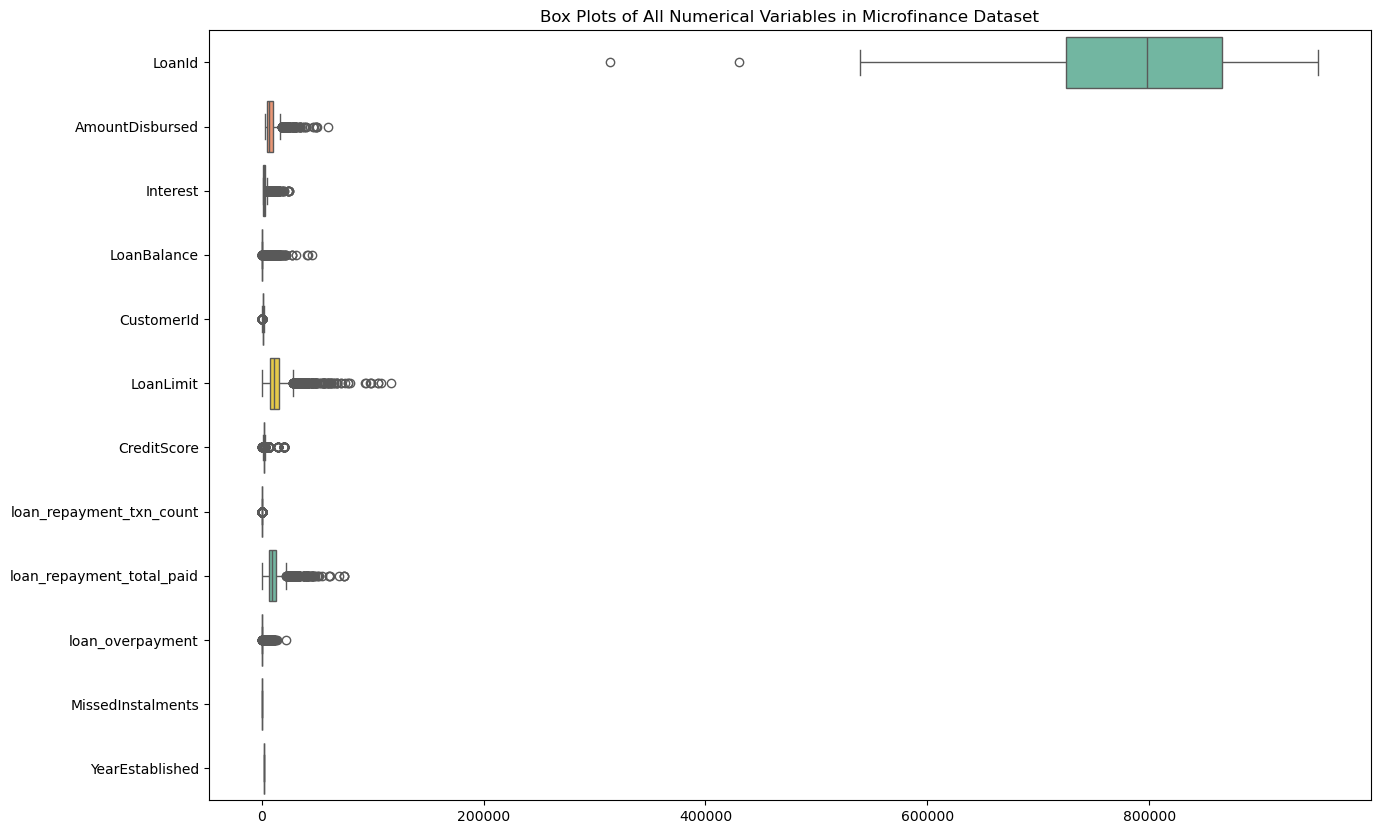

: 

In [ ]:
#Outliers for numerical data

numerical_data = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 10))  

sns.boxplot(data=numerical_data, orient="h", palette="Set2") 

plt.title('Box Plots of All Numerical Variables in Microfinance Dataset')

plt.show()

In [ ]:
# Outliers Identification using IQR 

def find_outliers_iqr(data, column):
  """
  Identifies outliers in a DataFrame column using the IQR method.

  Args:
      data: Pandas DataFrame.
      column: Name of the column to check for outliers.

  Returns:
      A Series of boolean values indicating outliers.
  """
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return (data[column] < lower_bound) | (data[column] > upper_bound)

# --- Identify outliers in all numerical columns ---

# Select only the numerical columns
numerical_data = df.select_dtypes(include=[np.number])

for column in numerical_data.columns:
    outliers = find_outliers_iqr(df, column)
    print(f"Number of outliers in '{column}': {outliers.sum()}")

Number of outliers in 'LoanId': 2
Number of outliers in 'AmountDisbursed': 157
Number of outliers in 'Interest': 374
Number of outliers in 'LoanBalance': 417
Number of outliers in 'CustomerId': 99
Number of outliers in 'LoanLimit': 235
Number of outliers in 'CreditScore': 230
Number of outliers in 'loan_repayment_txn_count': 239
Number of outliers in 'loan_repayment_total_paid': 194
Number of outliers in 'loan_overpayment': 162
Number of outliers in 'MissedInstalments': 0
Number of outliers in 'YearEstablished': 0


: 

Treatment: Decide whether to remove, transform, or keep outliers based on their nature and the analysis goals.

**Features with outliers to deal with:**
- AmountDisbursed (capping)
- LoanBalance
- loan_repayment_total_paid
- LoanLimit (remove 0), anything below loan limit < 1000
- Product Type (remove 12 WEEKS - SME 1 & 2)

#### a. AmountDisbursed

In [ ]:
#Defining outlier's range for (AmountDisbursed)
Q1 = df['AmountDisbursed'].quantile(0.25)
Q3 = df['AmountDisbursed'].quantile(0.75)
IQR = Q3 - Q1
#Any value outside (lower_bound) & (upper_bound) is considered as an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ad_outliers= df[(df['AmountDisbursed'] < lower_bound) | (df['AmountDisbursed'] > upper_bound)]

#How many times each outlier value appears
ad_outliers['AmountDisbursed'].value_counts()

AmountDisbursed
20000    48
30000    20
18000    16
25000    14
22000     9
23000     8
35000     5
27000     5
19000     4
21000     4
28000     4
49000     3
40000     2
32000     2
26000     2
38000     2
36000     1
50000     1
24000     1
47000     1
60000     1
31000     1
46000     1
34000     1
29000     1
Name: count, dtype: int64

: 

In [ ]:
# (Create a copy of the data to avoid modifying the original)
df_no_outliers = df.copy()
df_no_outliers = df_no_outliers[~outliers]

: 

In [ ]:
# (Create another copy for this method)
df_capped = df.copy()
upper_cap = df['AmountDisbursed'].quantile(0.95)  # Cap at 95th percentile 

df_capped['AmountDisbursed'] = np.where(
    df_capped['AmountDisbursed'] > upper_cap,
    upper_cap,
    df_capped['AmountDisbursed'])

: 

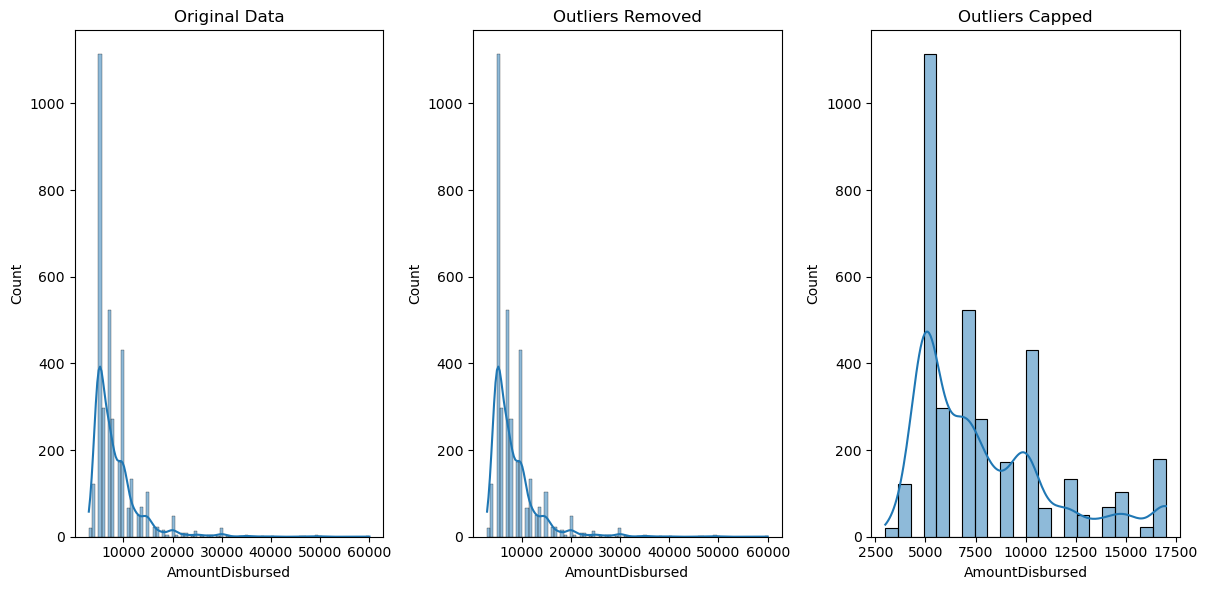

: 

In [ ]:
# Visualize results 

plt.figure(figsize=(12, 6))

#Plot1. Orignial Data
plt.subplot(1, 3, 1)
sns.histplot(df['AmountDisbursed'], kde=True)
plt.title('Original Data')

#Plot2. Outliers Removed
plt.subplot(1, 3, 2)
sns.histplot(df_no_outliers["AmountDisbursed"], kde=True)
plt.title('Outliers Removed')

#Plot2. Outliers Capped
plt.subplot(1, 3, 3)
sns.histplot(df_capped["AmountDisbursed"], kde=True)
plt.title('Outliers Capped')

plt.tight_layout()
plt.show()

#### b. loan_repayment_total_paid

In [ ]:
df['loan_repayment_total_paid'].describe()

count     3572.000000
mean     10400.055991
std       7088.355892
min         13.000000
25%       6500.000000
50%       9000.000000
75%      12750.000000
max      74000.000000
Name: loan_repayment_total_paid, dtype: float64

: 

**Observations:**
- Strong right skew → mean (10,400) > median (9,000)
- Very large max (74,000) compared to Q3 (12,750)
- Low repayment values (e.g., 35) were retained as they represent valid customer behavior. A log transformation was applied to reduce skewness and stabilize variance across the distribution

**Way forward:** 
- EDA/Reporting → use original column 
- Modeling → use log version

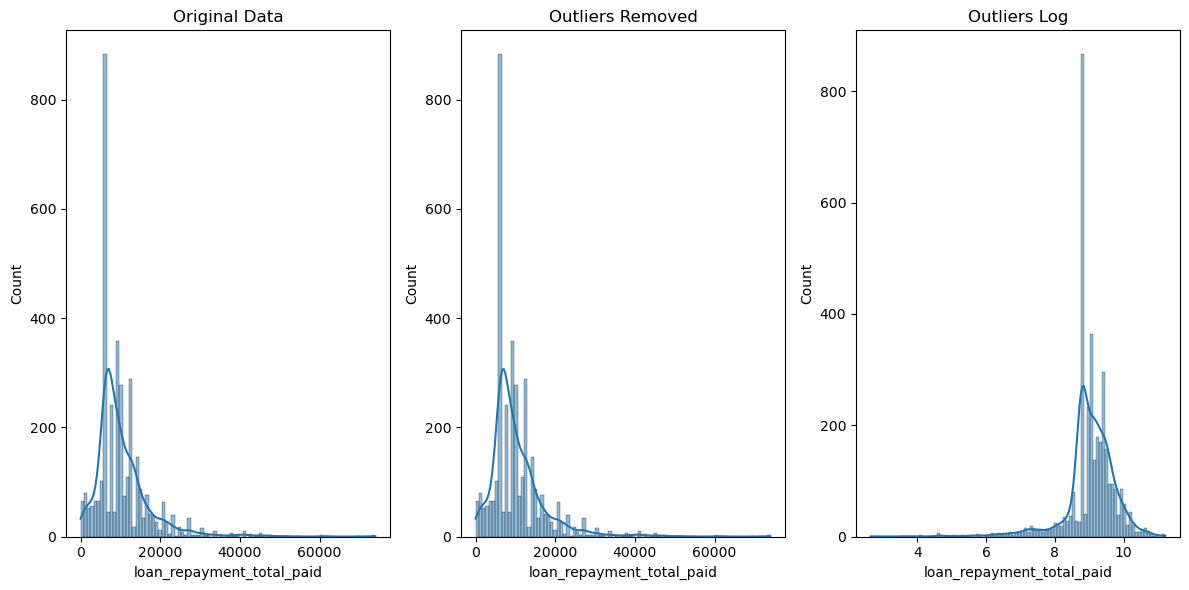

: 

In [ ]:
#log transformation
df_log = df.copy()
df_log['loan_repayment_total_paid'] = np.log1p(
    df_log['loan_repayment_total_paid']
)

# Visualize results 

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['loan_repayment_total_paid'], kde=True)
plt.title('Original Data')

plt.subplot(1, 3, 2)
sns.histplot(df_no_outliers["loan_repayment_total_paid"], kde=True)
plt.title('Outliers Removed')

plt.subplot(1, 3, 3)
sns.histplot(df_log["loan_repayment_total_paid"], kde=True)
plt.title('Outliers Log')

plt.tight_layout()

In [ ]:
df_log['loan_repayment_total_paid'].describe()

count    3572.000000
mean        9.032843
std         0.754597
min         2.639057
25%         8.779711
50%         9.105091
75%         9.453365
max        11.211834
Name: loan_repayment_total_paid, dtype: float64

: 

#### c. LoanLimit

In [ ]:
df['LoanLimit'].describe()

count      3572.000000
mean      13788.437850
std       10376.976115
min           0.000000
25%        8000.000000
50%       11000.000000
75%       16000.000000
max      117000.000000
Name: LoanLimit, dtype: float64

: 

**Industry Insights:** 
- A customer with **LoanLimit = 0** cannot receive a loan, so this value does not represent an actual lending capacity.Therefore, zero values were treated as missing and handled accordingly.
- Loan limits below 1,000 were reviewed against business rules and treated as invalid observations accordingly. 

**Observations:** 
- 0 is extremely far from the rest of the distribution. 
- Anything < 1,000 is far outside the normal range (likely the same issue as 0), Q1 = 8000

**Way forward:** 
- drop 0 & <1000 values

In [ ]:
# Mark invalid values as missing 
df['LoanLimit'] = df['LoanLimit'].replace(0, np.nan)
df.loc[df['LoanLimit'] < 1000, 'LoanLimit'] = np.nan

# Drop missing values
df = df.dropna(subset=['LoanLimit'])

# Reset index
df = df.reset_index(drop=True)

: 

#### d. Product

In [ ]:
df['Product'].value_counts()

Product
5 weeks credit ease     2580
7 weeks credit ease      701
10 weeks credit ease     186
12 weeks credit ease       3
sme - 3 months             1
sme - 4 months             1
Name: count, dtype: Int64

: 

In [ ]:
# Remove SME - 3 MONTHS and SME - 6 MONTHS products as they have very few samples
df = df[~df['Product'].isin(['SME - 3 MONTHS', 'SME - 6 MONTHS'])].copy()

: 

#### e. LoanBalance

- maybe just keep the same and do feature engineering later

In [ ]:
df['LoanBalance'].value_counts()

LoanBalance
0.00        3064
7500.00        8
5250.00        7
4200.00        6
4650.00        6
            ... 
16692.86       1
6115.00        1
350.00         1
6552.00        1
3777.01        1
Name: count, Length: 300, dtype: int64

: 

In [ ]:
#Defining outliers for (LoanBalance)
Q1 = df['LoanBalance'].quantile(0.25)
Q3 = df['LoanBalance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_LoanBalance= df[(df['LoanBalance'] < lower_bound) | (df['LoanBalance'] > upper_bound)]

#How many times each outlier value appears
outliers_LoanBalance['LoanBalance'].value_counts()

LoanBalance
7500.00     8
5250.00     7
3900.00     6
4200.00     6
4650.00     6
           ..
16692.86    1
6115.00     1
350.00      1
6552.00     1
3777.01     1
Name: count, Length: 299, dtype: int64

: 

# Save new dataset

In [ ]:
df.to_csv('data/cleaned_dataset.csv', index=False)

: 

In [ ]:
df['LoanBalance'].describe()

count     3472.000000
mean       756.391593
std       2892.413829
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45500.000000
Name: LoanBalance, dtype: float64

: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LoanId                        3472 non-null   int64         
 1   AmountDisbursed               3472 non-null   int64         
 2   Interest                      3472 non-null   int64         
 3   LoanBalance                   3472 non-null   float64       
 4   BorrowDate                    3472 non-null   datetime64[ns]
 5   Product                       3472 non-null   string        
 6   Branch                        3472 non-null   string        
 7   ClearDate                     3472 non-null   datetime64[ns]
 8   CustomerId                    3472 non-null   int64         
 9   Gender                        3472 non-null   string        
 10  LoanLimit                     3472 non-null   float64       
 11  CreditScore                   

: 

In [ ]:
df.shape

#original: (3572, 21)
#new: (3472, 21)

(3472, 21)

: 

# PROJECT EDA

**Pocess to explore the data and identify patterns in the data**

In [ ]:
# Load the main dataset 
df = pd.read_csv('data/cleaned_dataset.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


: 

In [ ]:
# James: Convert date columns to datetime format for easier analysis

# BorrowDate:  MM/DD/YYYY (Keep dayfirst=False)
df["BorrowDate"] = pd.to_datetime(df["BorrowDate"], errors="coerce", dayfirst=False)

# problematic columns: Use format='mixed' to handle the mix of DD/MM/YYYY and YYYY-MM-DD
df["loan_repayment_first_payment"] = pd.to_datetime(df["loan_repayment_first_payment"], errors="coerce", dayfirst=True, format='mixed')
df["loan_repayment_last_payment"] = pd.to_datetime(df["loan_repayment_last_payment"], errors="coerce", dayfirst=True, format='mixed')

# ClearDate:  YYYY-MM-DD
df["ClearDate"] = pd.to_datetime(df["ClearDate"], errors="coerce", format="%Y-%m-%d")

# Check the result
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


: 

# Final data cleanup

In [ ]:
# James: More data cleaning 
# A customer cannot make a repayment 100 days BEFORE they borrowed the money.
# We allow a small buffer (-10 days) for potential booking errors, but anything less is garbage.

df['days_to_first'] = (df['loan_repayment_first_payment'] - df['BorrowDate']).dt.days
df = df[(df['days_to_first'] >= -10) | (df['days_to_first'].isna())].copy()

: 

# EDA per Hypothesis

**Please mark your code with the first comment having your name. e.g. James - then explain what you are doing in the block**

In [ ]:
# More data cleaning 
# A customer cannot make a repayment 100 days BEFORE they borrowed the money.
# We allow a small buffer (-10 days) for potential booking errors, but anything less is garbage.
df['days_to_first'] = (df['loan_repayment_first_payment'] - df['BorrowDate']).dt.days
df = df[(df['days_to_first'] >= -10) | (df['days_to_first'].isna())].copy()

# The data logs the same loan twice. We keep only the first instance.
df = df.drop_duplicates(subset=['CustomerId', 'BorrowDate'], keep='first')

# A loan cannot be cleared BEFORE it was borrowed.
df = df[df['ClearDate'] >= df['BorrowDate']].copy()

# A business established in 2024 cannot borrow money in 2023.
df = df[df['YearEstablished'] <= df['BorrowDate'].dt.year].copy()

# Cleanup to remove Product types (sme - 3 months, sme - 4 months and 12 weeks credit ease) fron the dataset
df = df[~df['Product'].isin(['sme - 3 months', 'sme - 4 months', '12 weeks credit ease'])]
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1565 entries, 0 to 3469
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LoanId                        1565 non-null   int64         
 1   AmountDisbursed               1565 non-null   int64         
 2   Interest                      1565 non-null   int64         
 3   LoanBalance                   1565 non-null   float64       
 4   BorrowDate                    1565 non-null   datetime64[ns]
 5   Product                       1565 non-null   object        
 6   Branch                        1565 non-null   object        
 7   ClearDate                     1565 non-null   datetime64[ns]
 8   CustomerId                    1565 non-null   int64         
 9   Gender                        1565 non-null   object        
 10  LoanLimit                     1565 non-null   float64       
 11  CreditScore                   1565 

(1565, 22)

: 

Number of defaulters: 133
Percentage of Defaults vs Non-Defaults:
 0    91.501597
1     8.498403
Name: proportion, dtype: float64


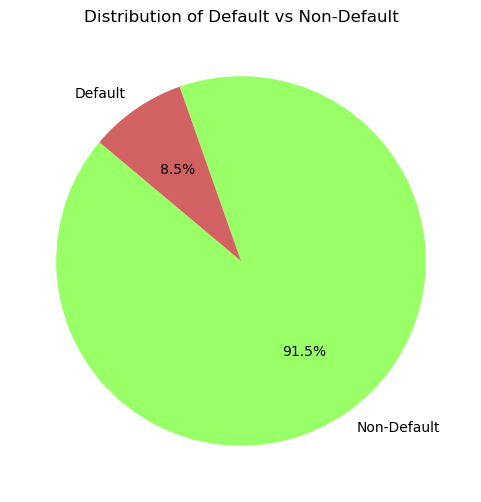

: 

In [ ]:
## Additional data cleaning

# James
# Understading the target variable Default where default is when ClearDate is greater than 2025-12-15 and LoanBalance is greater than 0
defaulters = ((df['ClearDate'] < '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)
print("Number of defaulters:", defaulters.sum())

# Calculate the percentage of defaults vs non-defaults
default_counts = defaulters.value_counts(normalize=True) * 100
print("Percentage of Defaults vs Non-Defaults:\n", default_counts)

# Visualize the distribution of the target variable as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=['Non-Default', 'Default'], autopct='%1.1f%%', startangle=140, colors=["#99ff66","#d26161"])
plt.title('Distribution of Default vs Non-Default')
plt.show()

# Heatmap

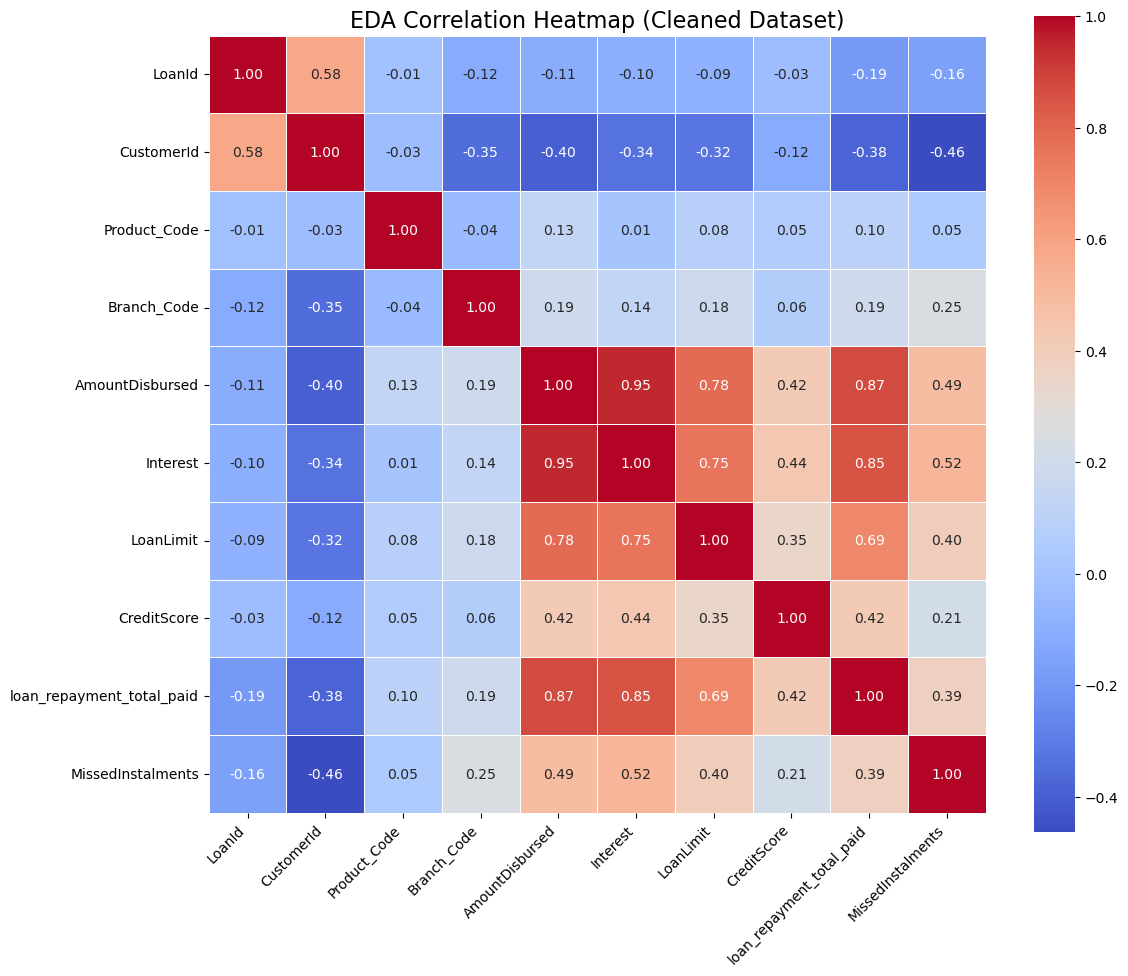

: 

In [ ]:
# Convert categorical columns to numerical codes
df['Product_Code'] = df['Product'].astype('category').cat.codes
df['Branch_Code'] = df['Branch'].astype('category').cat.codes

# Columns to include in the heatmap
target_cols = [
    'LoanId', 'CustomerId', 'Product_Code', 'Branch_Code',
    'AmountDisbursed', 'Interest', 'LoanLimit', 'CreditScore',
    'loan_repayment_total_paid', 'MissedInstalments'
]

# Calculate the correlation matrix
corr_matrix = df[target_cols].corr()

# Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

plt.title('EDA Correlation Heatmap (Cleaned Dataset)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Print and save the heatmap
plt.show()

# Frequency between interest, loan limit, miss installment

Text(0.5, 0, 'Interest')

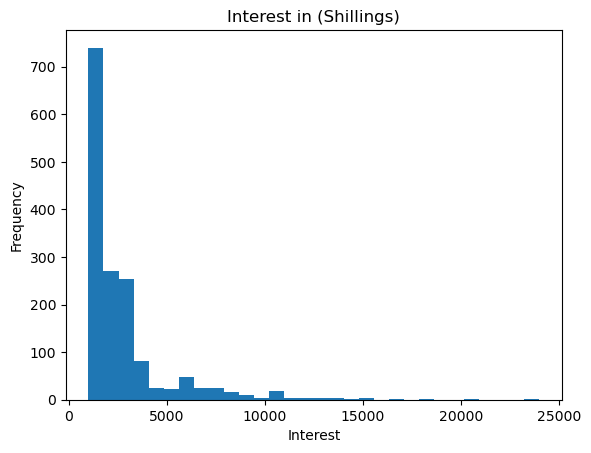

: 

In [ ]:
# Nana, Amr

#Plotting Interests in Shillings to check its frequency histogram
ax=df['Interest'].plot(kind='hist'
                      , bins=30, 
                      title= 'Interest in (Shillings)')
ax.set_xlabel ('Interest')

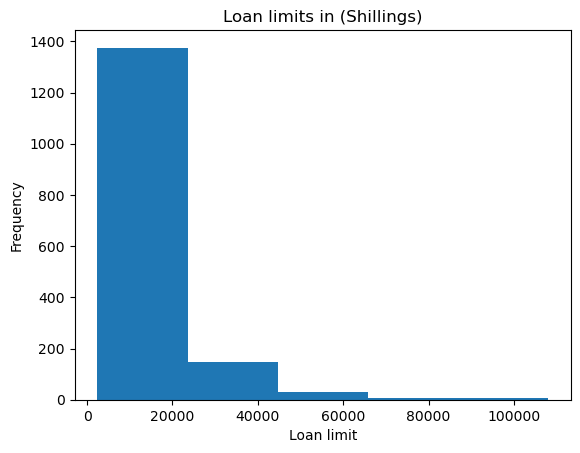

: 

In [ ]:
# Nana, Amr
#Plotting (loan limit) to check its frequency histogram.
#The value here are scaled from the csv
ax=df['LoanLimit'].plot(kind='hist'
                      , bins=5, 
                      title= 'Loan limits in (Shillings)')

ax.set_xlabel ('Loan limit')
plt.show()

#I am trying to understand why they are scaled ? and what do the scaled values reflect?

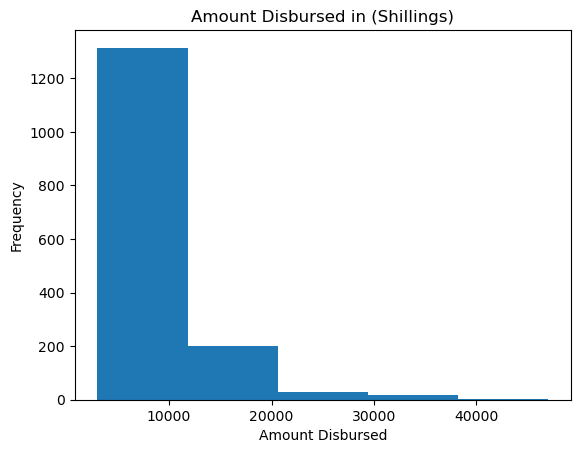

: 

In [ ]:
# Nana, Amr
#Plotting (amount disbursed) to check its frequency histogram.

ax=df['AmountDisbursed'].plot(kind='hist'
                      , bins=5, 
                      title= 'Amount Disbursed in (Shillings)')

ax.set_xlabel ('Amount Disbursed')
plt.show()

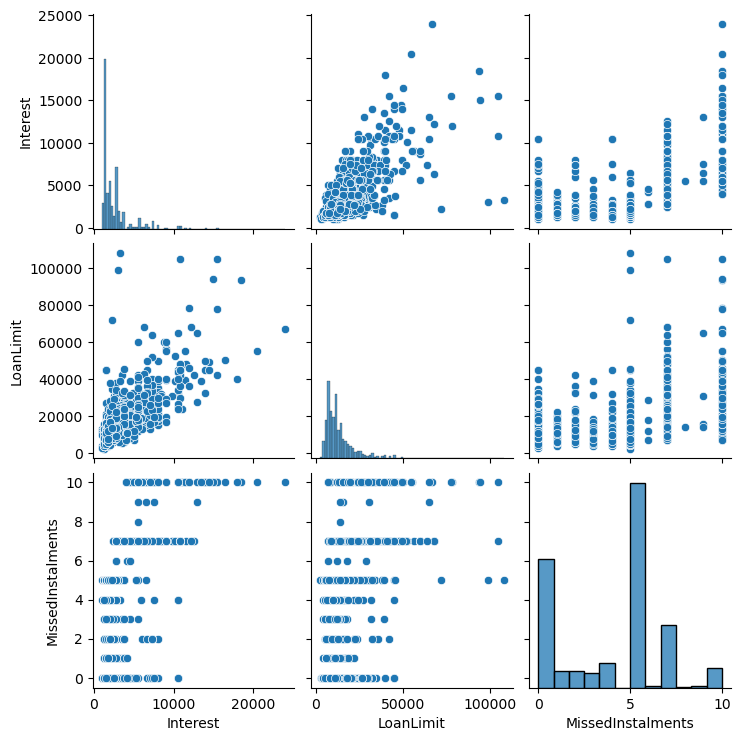

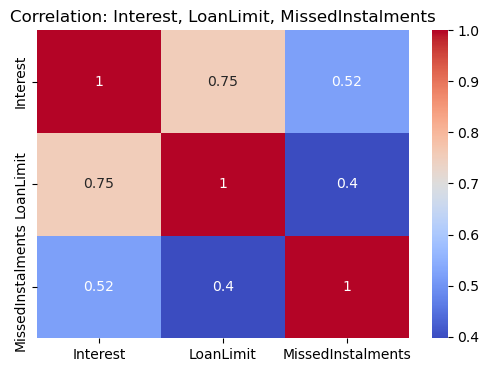

: 

In [ ]:
#Kunal
# A pairplot gives you a quick, visual overview of how three variables relate to each other:
# - Scatterplots for each pair
# - Histograms for each individual variable
# - Helps detect linear or non‑linear patterns
# - Helps spot clusters, outliers, or unusual behaviour
# This is the fastest way to visually test whether:
# - Higher Interest -> more MissedInstalments
# - Higher LoanLimit -> more MissedInstalments
# - Interest and LoanLimit are related to each other
# Scatterplot: Interest vs MissedInstalments - If points trend upward -> higher interest leads to more missed instalments.
# Scatterplot: LoanLimit vs MissedInstalments - If points trend upward -> larger loans lead to more missed instalments.
# Scatterplot: Interest vs LoanLimit - Shows whether high‑interest loans are also high‑value loans.
# Histograms: Show the distribution of each variable (e.g., skewed, normal, heavy‑tailed).

sns.pairplot(df[['Interest', 'LoanLimit', 'MissedInstalments']])
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[['Interest','LoanLimit','MissedInstalments']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Interest, LoanLimit, MissedInstalments")
plt.show()

# Hypothesis 01. Woman has high risk to make default micro finance due to restricted social power

Conclusion: Company has 131 more male client than female client, while few female clients have higher interest amount than male.
Question: Does it mean female client tend to borrow high amount of loan?

<BarContainer object of 2 artists>

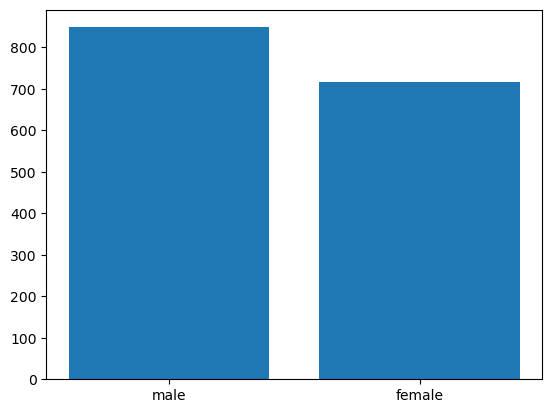

: 

In [ ]:
## Nana
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)

Gender
male      848
female    717
Name: count, dtype: int64

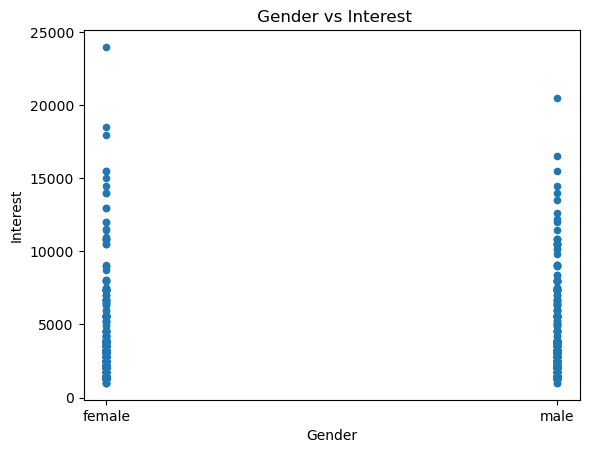

: 

In [ ]:
# Amr

#Plotting interest vs Gender to check if the gender affects the amount of interst directly or indirectly.
df.plot (kind='scatter', x= 'Gender' , y = 'Interest' , title = ' Gender vs Interest')
# Most women tend to have interest lower than 10K.
# Most men have interest up to 15K
# Interest higher than 15K is rare for both genders

df['Gender'].value_counts()


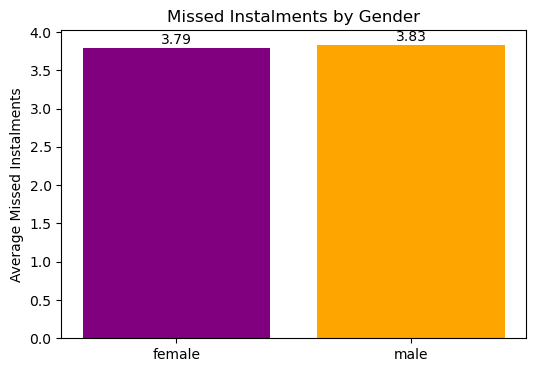

: 

In [ ]:
#Kunal

gender_missed = df.groupby('Gender')['MissedInstalments'].mean()

plt.figure(figsize=(6,4))
bars = plt.bar(gender_missed.index, gender_missed.values, color=['purple','orange'])
plt.ylabel("Average Missed Instalments")
plt.title("Missed Instalments by Gender")

# Add numbers on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{yval:.2f}", ha='center')

plt.show()

# Hypothesis 02. Customer who has high credit score makes less miss instalments

Conclusion : This suggests that high credit scores do not necessarily correlate with lower missed instalments.
High credit scores are also associated with higher average missed instalments as the amount of loan is higher than lower credit scores.

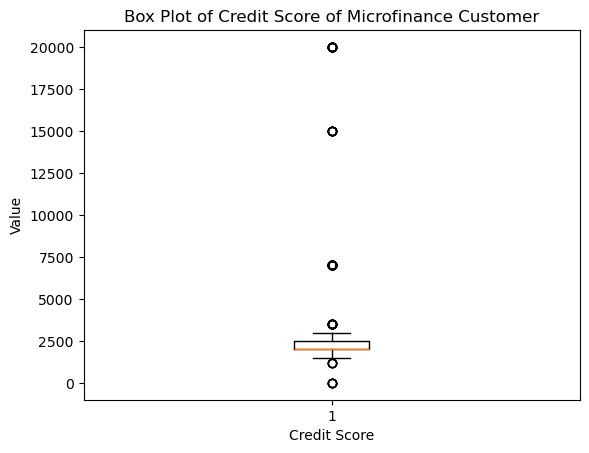

: 

In [ ]:
# Nana - Box plot of Credit Score to identify outliers and distribution
plt.boxplot(df['CreditScore'])

plt.xlabel('Credit Score')
plt.ylabel('Value')
plt.title('Box Plot of Credit Score of Microfinance Customer')

plt.show()

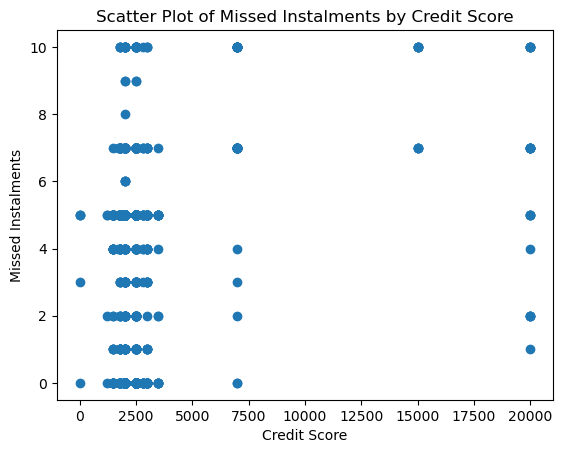

: 

In [ ]:
# Nana, Kunal
# Scatter plots 

plt.scatter(df['CreditScore'], df['MissedInstalments'])

plt.xlabel('Credit Score')
plt.ylabel('Missed Instalments')
plt.title('Scatter Plot of Missed Instalments by Credit Score')

plt.show()

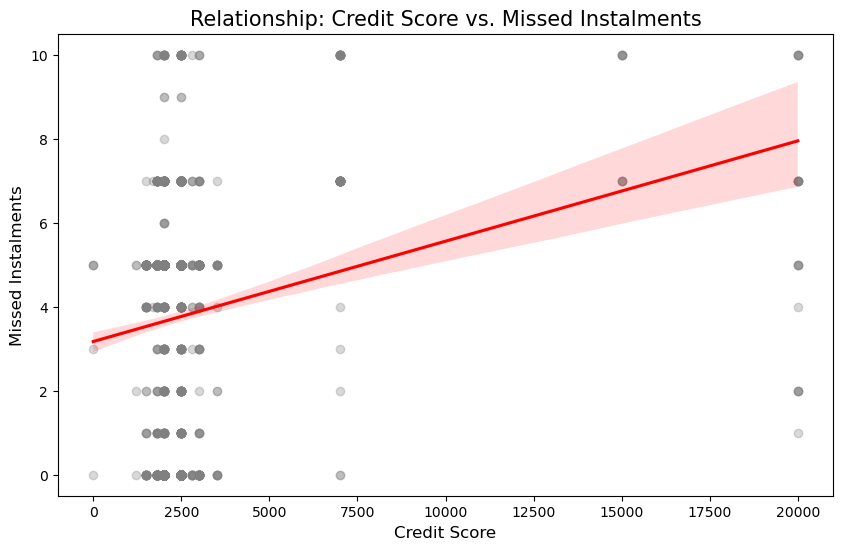

: 

In [ ]:
# Sumin
# Visualization: Scatter plot with regression line - Credit Score vs. Missed Instalments
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='CreditScore', y='MissedInstalments', 
            scatter_kws={'alpha':0.3, 'color':'gray'}, line_kws={'color':'red'})

plt.title('Relationship: Credit Score vs. Missed Instalments', fontsize=15)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Missed Instalments', fontsize=12)
plt.show()

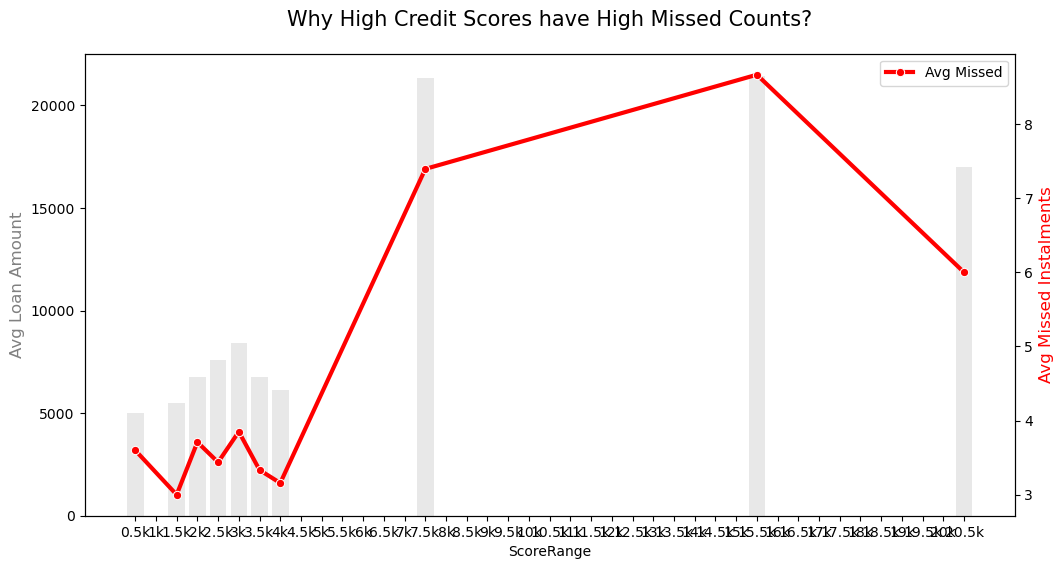

: 

In [ ]:
# Sumin - Does high credit score correlate with lower missed instalments?
# What can be read : 
# High credit scores are associated with higher average loan amounts.
# High credit scores are also associated with higher average missed instalments as the amount of loan is higher than lower credit scores.
# This suggests that high credit scores do not necessarily correlate with lower missed instalments.

# 1. Data preparation
bins = range(0, int(df['CreditScore'].max()) + 501, 500)
labels = [f'{b/1000:g}k' for b in bins[1:]]
df['ScoreRange'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)

# 2. Average per group
analysis = df.groupby('ScoreRange', observed=True).agg({
    'MissedInstalments': 'mean',
    'AmountDisbursed': 'mean',
}).reset_index()

# 3. Visualization: Bar and Line Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart: Loan Amount (background)
sns.barplot(data=analysis, x='ScoreRange', y='AmountDisbursed', color='lightgray', alpha=0.5, ax=ax1)
ax1.set_ylabel('Avg Loan Amount', fontsize=12, color='gray')

# Line plot: Missed Instalments (foreground)
ax2 = ax1.twinx()
sns.lineplot(data=analysis, x='ScoreRange', y='MissedInstalments', color='red', marker='o', linewidth=3, ax=ax2, label='Avg Missed')
ax2.set_ylabel('Avg Missed Instalments', fontsize=12, color='red')

plt.title('Why High Credit Scores have High Missed Counts?', fontsize=15, pad=20)
plt.show()

# Hypothesis 03. The more client has ability to pay off(istead of making default micro finance), they will choose 5 weeks credit ease product.
as they are able to pay off in short term. ( 5 weeks > 10 weeks )

Conclusion : 5 weeks credit ease is most popular product and has largest group of default in proportion to number of client.
But out of number of client in each product, 10 weeks credit ease product makes miss instalments often comparing than 5 weeks, 7 weeks credit ease.
Interestingly, 7 weeks credit ease has highest default percentage among the products.

-> 5 weeks credit ease clients make less default in micro finance. / 10 weeks, 7 weeks has high risk to make default micro finance.

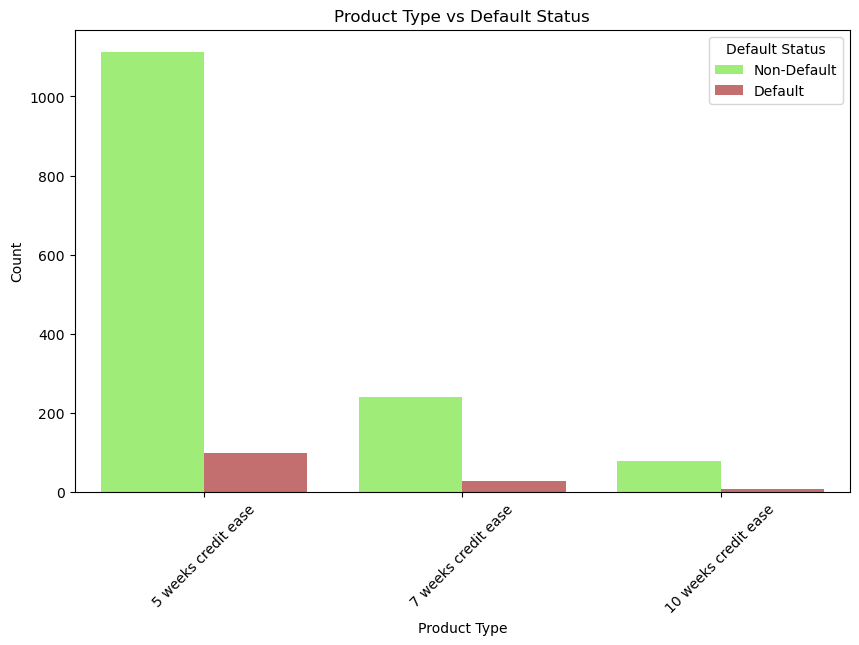

: 

In [ ]:
# James

# Analyze relationships between Product and the default
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product', hue=defaulters, palette=["#99ff66","#d26161"])
plt.title('Product Type vs Default Status')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Non-Default', 'Default'])
plt.xticks(rotation=45)
plt.show()

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/1051150638.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=product_risk, x='MissedInstalments', y='Product', palette='Reds_r')


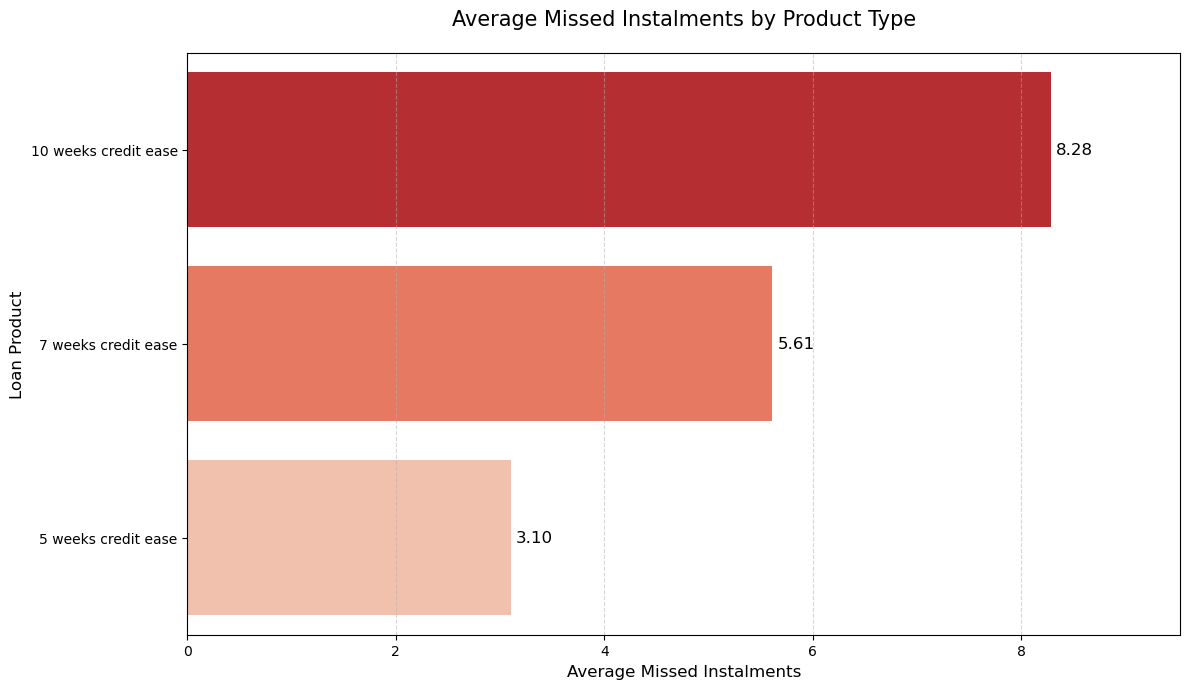

: 

In [ ]:
# Sumin, Kunal - Average Missed Instalments by product
# Borrowers who can repay quickly choose 5‑week products instead of 10‑week.
# Product choice reflects repayment capacity.
# Short‑term products may attract lower‑risk borrowers.
# 10 weeks credit ease has the highest average missed instalments
# Question: Why do clients opting for '10 weeks credit ease' tend to have higher missed instalments compared to other products?

# Visualization: Average Missed Instalments by product -> to detact Risky clients
product_risk = df.groupby('Product')['MissedInstalments'].mean().sort_values(ascending=False).reset_index()

# Visualization: Bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=product_risk, x='MissedInstalments', y='Product', palette='Reds_r')


for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 0.05,     
            p.get_y() + p.get_height()/2,
            f'{width:.2f}', 
            va='center',    
            fontsize=12, 
            fontweight='regular')

plt.title('Average Missed Instalments by Product Type', fontsize=15, pad=20)
plt.xlabel('Average Missed Instalments', fontsize=12)
plt.ylabel('Loan Product', fontsize=12)

plt.xlim(0, product_risk['MissedInstalments'].max() * 1.15)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/3783502285.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


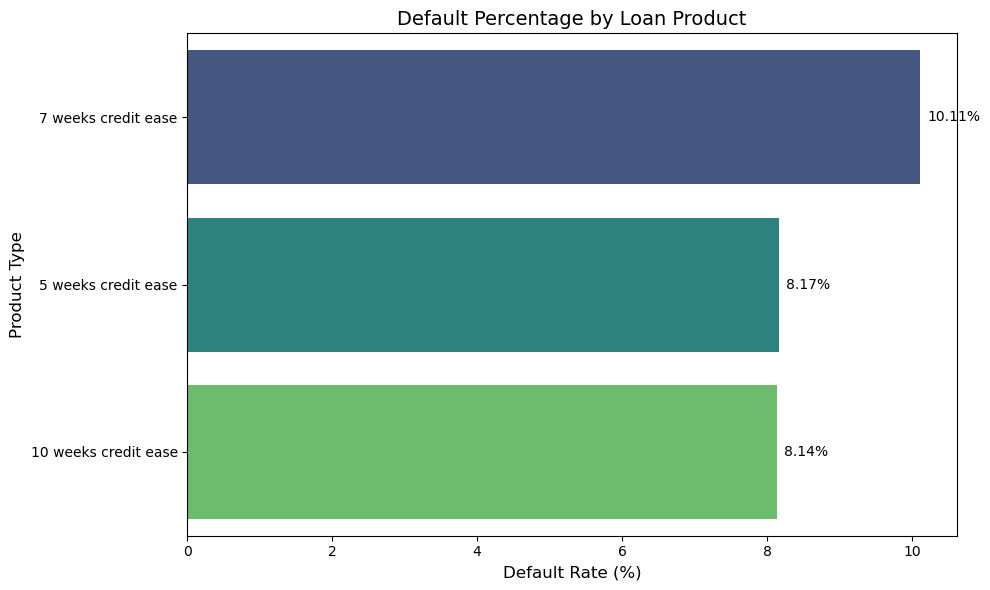

: 

In [ ]:
# James
# Introduce bool (1,0) for isDefault
df['IsDefault'] = defaulters

# Calculate default percentages per product type
# Group by Product and take the mean of the 'IsDefault' column
product_defaults = df.groupby('Product')['IsDefault'].mean().reset_index()
product_defaults['Default Percentage'] = product_defaults['IsDefault'] * 100

# Sort the data (descending) so the riskiest products are at the top
product_defaults = product_defaults.sort_values(by='Default Percentage', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Default Percentage', 
    y='Product', 
    data=product_defaults, 
    palette='viridis'
)
plt.title('Default Percentage by Loan Product', fontsize=14)
plt.xlabel('Default Rate (%)', fontsize=12)
plt.ylabel('Product Type', fontsize=12)

# Add the actual percentage text next to each bar
for index, value in enumerate(product_defaults['Default Percentage']):
    plt.text(value + 0.1, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/1672467839.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_stats, x='Product', y='AvgBalance', palette='Blues_r', ax=ax1, alpha=0.7)


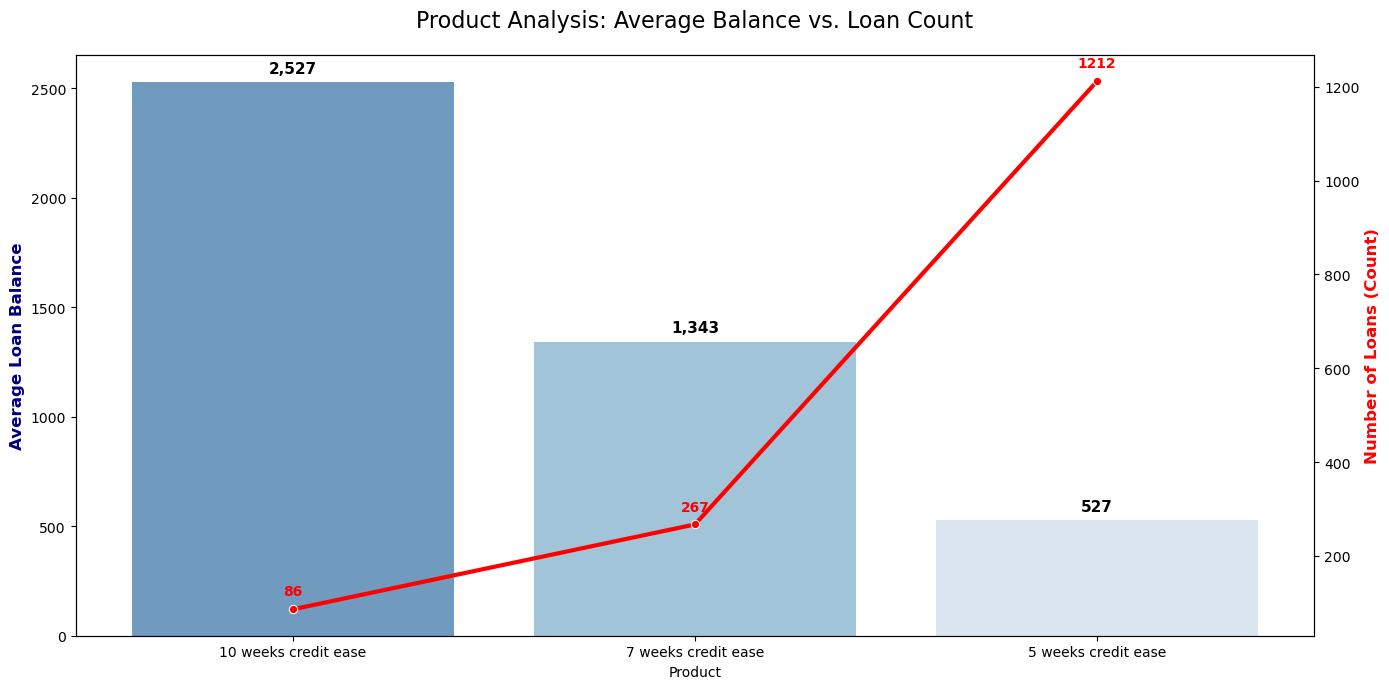

: 

In [ ]:
# Sumin - showing 10 weeks credit ease client tend to loan high amount but less clients.

# Calculate product statistics
product_stats = df.groupby('Product').agg(
    LoanCount=('LoanId', 'count'),
    AvgBalance=('LoanBalance', 'mean')
).sort_values(by='AvgBalance', ascending=False).reset_index()

# Visualization: Average Balance vs. Loan Count by Product
fig, ax1 = plt.subplots(figsize=(14, 7))

# Average Balance (Bar Chart)
sns.barplot(data=product_stats, x='Product', y='AvgBalance', palette='Blues_r', ax=ax1, alpha=0.7)
ax1.set_ylabel('Average Loan Balance', fontsize=12, fontweight='bold', color='navy')
ax1.set_title('Product Analysis: Average Balance vs. Loan Count', fontsize=16, pad=20)

# Number labels on top of bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.0f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), 
                 textcoords='offset points', fontsize=11, fontweight='bold')

# number of Loans (Line Chart - Dual Axis)
ax2 = ax1.twinx() 
sns.lineplot(data=product_stats, x='Product', y='LoanCount', color='red', marker='o', linewidth=3, ax=ax2)
ax2.set_ylabel('Number of Loans (Count)', fontsize=12, fontweight='bold', color='red')

# Annotate Loan Count values
for i, txt in enumerate(product_stats['LoanCount']):
    ax2.annotate(txt, (product_stats['Product'][i], product_stats['LoanCount'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='red', fontweight='bold')

plt.tight_layout()
plt.show()

# Hypothesis 04. The more client borrow large amont of loan, the higher possibility to make defaulty.

Conclusion : Contrary to expectations, client who borrow less amount of loan makes much defaulty than who borrow large amont of loan.

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/1784705482.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_defaults = df.groupby('LoanAmountBin')['IsDefault'].mean().reset_index()
/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/1784705482.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


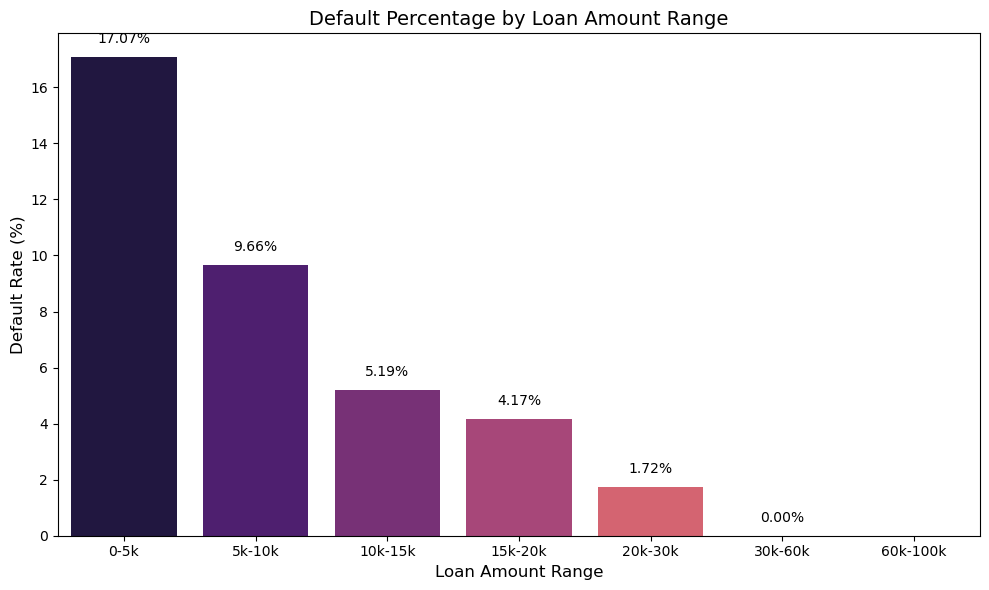

: 

In [ ]:
# James

# Analyze relationship between LoanAmount and IsDefault using a binned bar plot for differet loan ranges
# Define bins and labels for loan amounts
bins = [0, 5000, 10000, 15000, 20000, 30000, 60000, 100000] 
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-30k', '30k-60k', '60k-100k']

# Create a new column for binned loan amounts
df['LoanAmountBin'] = pd.cut(df['AmountDisbursed'], bins=bins, labels=labels, right=False)

# Calculate the average default rate for each range
loan_amount_defaults = df.groupby('LoanAmountBin')['IsDefault'].mean().reset_index()
loan_amount_defaults['Default Percentage'] = loan_amount_defaults['IsDefault'] * 100
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='LoanAmountBin', 
    y='Default Percentage', 
    data=loan_amount_defaults, 
    palette='magma'
)
plt.title('Default Percentage by Loan Amount Range', fontsize=14)
plt.xlabel('Loan Amount Range', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
# Add the actual percentage text above each bar
for index, value in enumerate(loan_amount_defaults['Default Percentage']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')  
plt.tight_layout()
plt.show()


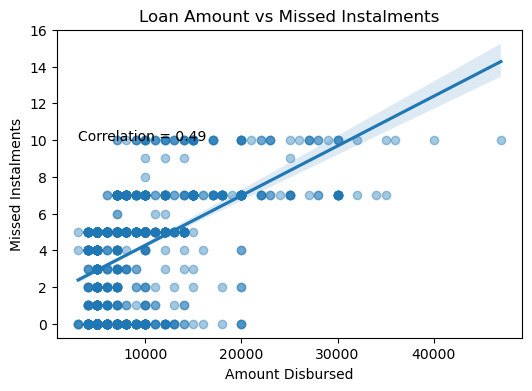

: 

In [ ]:
#Kunal
# Bigger loans create more repayment stress.
# Loan size is one of the strongest predictors of default in microfinance


plt.figure(figsize=(6,4))
sns.regplot(x='AmountDisbursed', y='MissedInstalments', data=df, scatter_kws={'alpha':0.4})
plt.xlabel("Amount Disbursed")
plt.ylabel("Missed Instalments")
plt.title("Loan Amount vs Missed Instalments")

corr = df['AmountDisbursed'].corr(df['MissedInstalments'])
plt.text(df['AmountDisbursed'].min(), df['MissedInstalments'].max(), f"Correlation = {corr:.2f}")

plt.show()

# Hypothesis 05. Risk of default micro finance is different by branch as their lifestlye, quality of life, average salary might be different.

Conclusion : Molo has higher miss instalments rate than Engineer, while default rate is lower than Engineer
** Good to look into why miss instalments doesn't have strong correlation with default at the end.

--- Default Rates by Branch (%) ---
Branch
engineer    18.20
molo         5.03
dtype: float64


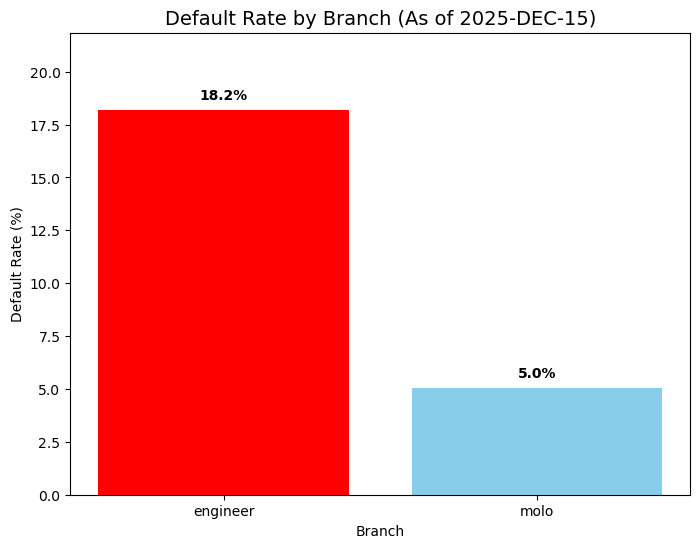

: 

In [ ]:
# James
# Visualizing the percentage of defaulters/number of loans based on branch as a chart

# Calculate Default Rate by Branch
branch_stats = defaulters.groupby(df['Branch']).mean() * 100

print("--- Default Rates by Branch (%) ---")
print(branch_stats.round(2))

# Visualization
plt.figure(figsize=(8, 6))
colors = ['red', 'skyblue']

plt.bar(branch_stats.index, branch_stats.values, color=colors)

plt.title('Default Rate by Branch (As of 2025-DEC-15)', fontsize=14)
plt.ylabel('Default Rate (%)')
plt.xlabel('Branch')
plt.ylim(0, max(branch_stats.values) * 1.2) 

for i, v in enumerate(branch_stats.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontweight='bold')

plt.show()

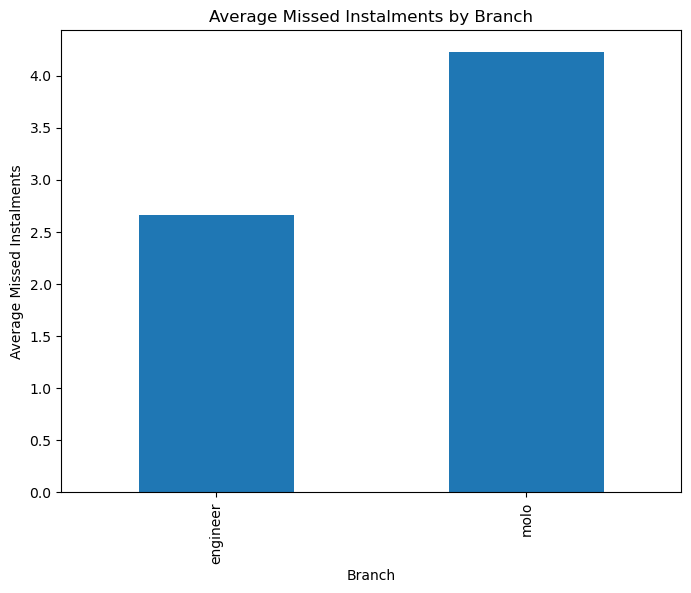

: 

In [ ]:
#Group analysis
average_misinstalments_by_branch = df.groupby('Branch')['MissedInstalments'].mean()

plt.figure(figsize=(8, 6))

average_misinstalments_by_branch.plot(kind='bar')

plt.xlabel('Branch')
plt.ylabel('Average Missed Instalments')
plt.title('Average Missed Instalments by Branch')

plt.show()

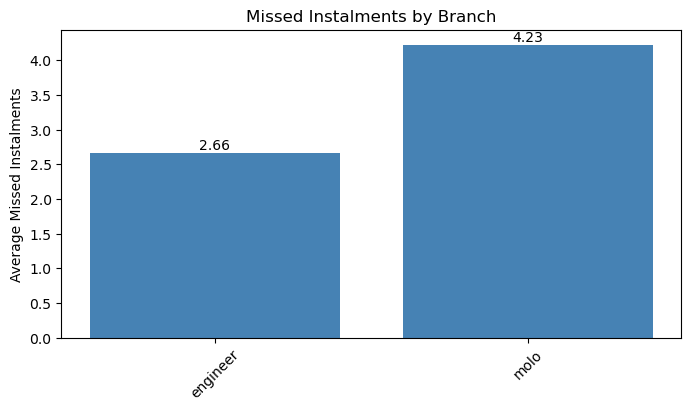

: 

In [ ]:
#Kunal
# Branches serve different communities with different economic conditions.
# Branch‑level insights help:
# - Identify high‑risk regions
# - Improve branch‑level training
# - Adjust loan policies

branch_missed = df.groupby('Branch')['MissedInstalments'].mean()

plt.figure(figsize=(8,4))
bars = plt.bar(branch_missed.index, branch_missed.values, color='steelblue')
plt.ylabel("Average Missed Instalments")
plt.title("Missed Instalments by Branch")
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{yval:.2f}", ha='center')

plt.show()

# Hypothesis 06. Frequent client has high risk to make default micro finance.

Conclusion : 
Most clients use this microfinance service only 1–2 times, with very few exceeding 3 uses. Interestingly, clients who have used the product 5–6 times show a higher tendency to default compared to those in the 3–4 times range.

Customer loan counts:
 CustomerId
1048    16
1026    15
484     15
1000    14
1019    13
        ..
1300     1
1323     1
1357     1
1398     1
787      1
Name: count, Length: 629, dtype: int64


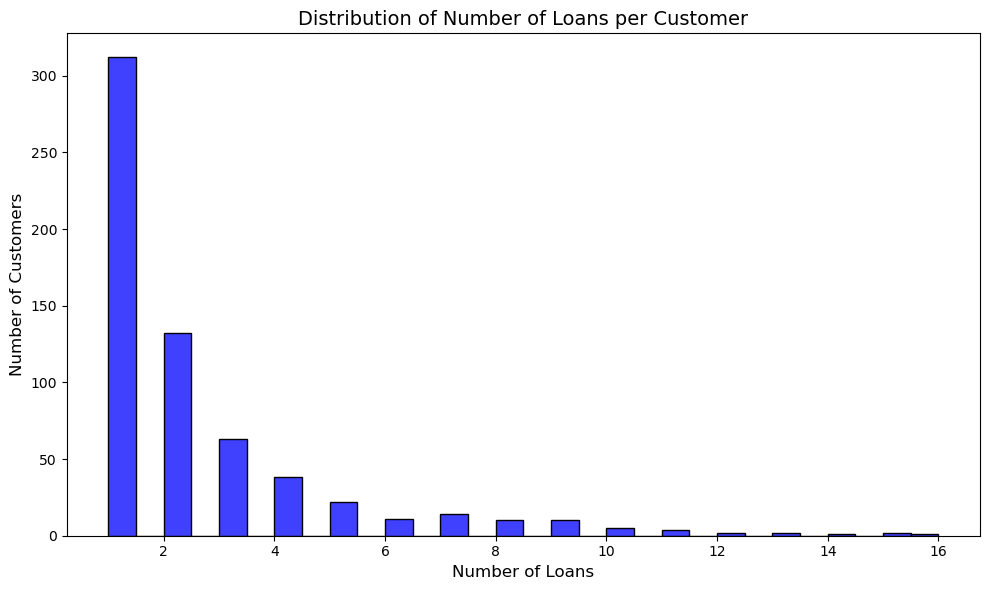

: 

In [ ]:
 # James

# Get the customer loan counts based on CustomerId and plot as a histogram
customer_loan_counts = df['CustomerId'].value_counts()
print("Customer loan counts:\n", customer_loan_counts)
plt.figure(figsize=(10, 6))
sns.histplot(customer_loan_counts, bins=30, kde=False, color='blue')
plt.title('Distribution of Number of Loans per Customer', fontsize=14)
plt.xlabel('Number of Loans', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Get the number of customers with 1 loan
single_loan_customers = customer_loan_counts[customer_loan_counts == 1].count()
print("Number of customers with 1 loan:", single_loan_customers)

Number of customers with 1 loan: 312


: 

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/3148774744.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


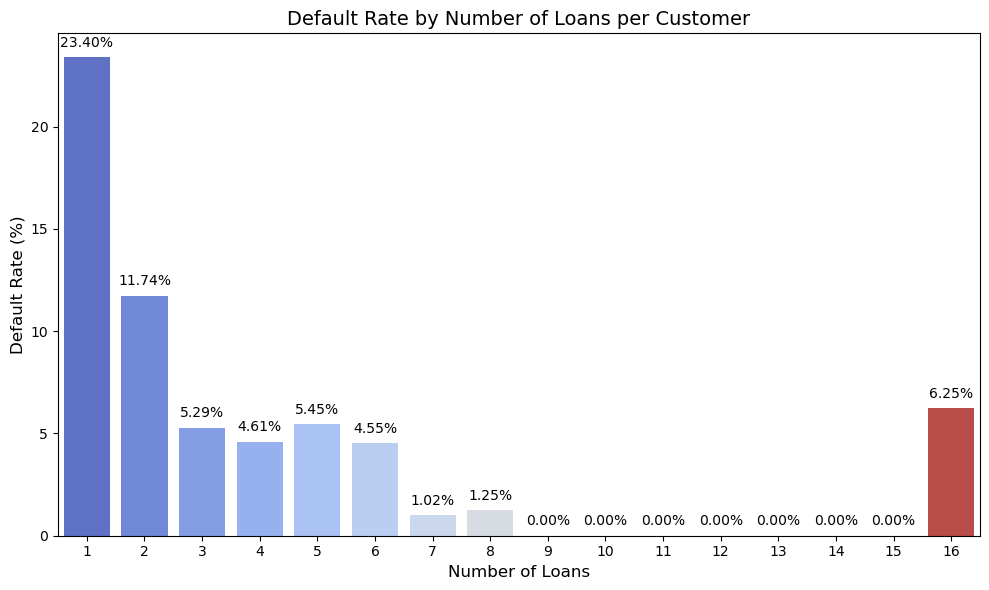

: 

In [ ]:
# Visualize the default rate based on the number of loans per customer as a bar plot
loan_count_defaults = df.groupby(df['CustomerId'].map(customer_loan_counts))['IsDefault'].mean().reset_index()
loan_count_defaults.columns = ['Number of Loans', 'Default Rate']
loan_count_defaults['Default Rate'] *= 100  
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Number of Loans', 
    y='Default Rate', 
    data=loan_count_defaults, 
    palette='coolwarm'
)
plt.title('Default Rate by Number of Loans per Customer', fontsize=14)
plt.xlabel('Number of Loans', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
# Add the actual percentage text above each bar
for index, value in enumerate(loan_count_defaults['Default Rate']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

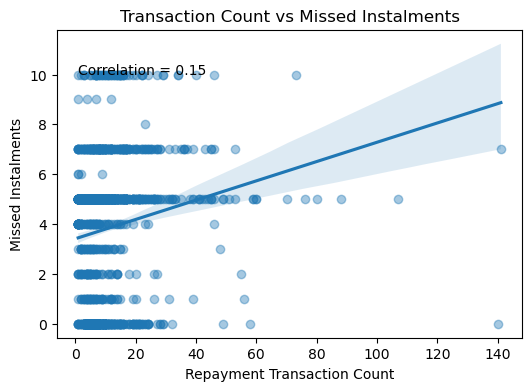

: 

In [ ]:
#Kunal
# High transaction frequency may indicate repayment struggles.
# Clients who frequently interact with the system may be:
# - Rescheduling payments
# - Making partial payments
# - Showing signs of financial stres

plt.figure(figsize=(6,4))
sns.regplot(x='loan_repayment_txn_count', y='MissedInstalments', data=df, scatter_kws={'alpha':0.4})
plt.xlabel("Repayment Transaction Count")
plt.ylabel("Missed Instalments")
plt.title("Transaction Count vs Missed Instalments")

corr = df['loan_repayment_txn_count'].corr(df['MissedInstalments'])
plt.text(df['loan_repayment_txn_count'].min(), df['MissedInstalments'].max(), f"Correlation = {corr:.2f}")

plt.show()

# Hypothesis 07. If client makes miss instalment or transaction frequently, they have high possibility to make default micro finance.

Conclusion : The frequency of missed installments and transaction counts correlates with the default rate, but the relationship is not linear
1. The highest default rate is among clients with 6 missed installments, while the second highest is surprisingly those with just 1 miss.
2. Clients with 0–4 transactions are at highest risk. Interestingly, risk increases to 13% once transactions exceed 50, whereas the 5–49 range shows the lowest risk.

Frequent borrowing can indicate:
- dependency on credit
- unstable cash flow
- repeated refinancing
- potential over‑indebtedness
Even though we don’t have a direct “loan count” column, we do have:
- CustomerId
- LoanId
We can test whether customers with multiple loans show higher default rates

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/3457303589.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


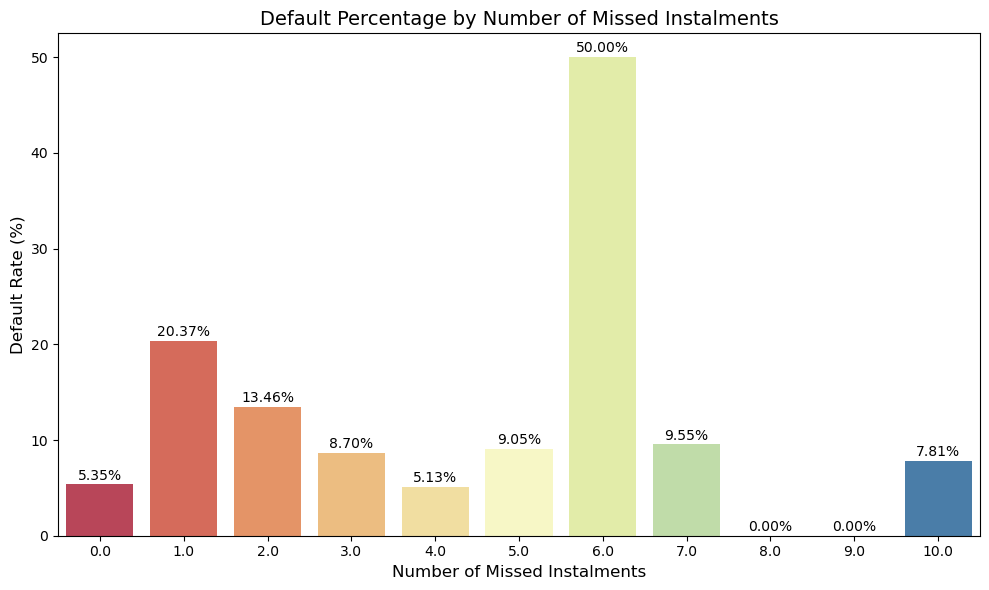

: 

In [ ]:
# James

# Visualize the relationship between MissedInstalments and IsDefault using a bar plot
missed_instalment_defaults = df.groupby('MissedInstalments')['IsDefault'].mean().reset_index()
missed_instalment_defaults['Default Percentage'] = missed_instalment_defaults['IsDefault'] * 100
plt.figure(figsize=(10, 6))
sns.barplot(
    x='MissedInstalments', 
    y='Default Percentage', 
    data=missed_instalment_defaults, 
    palette='Spectral'
)
plt.title('Default Percentage by Number of Missed Instalments', fontsize=14)
plt.xlabel('Number of Missed Instalments', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
# Add the actual percentage text above each bar
for index, value in enumerate(missed_instalment_defaults['Default Percentage']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/592463311.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_repayment_defaults = df.groupby('LoanRepaymentTxnCountBin')['IsDefault'].mean().reset_index()
/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/592463311.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


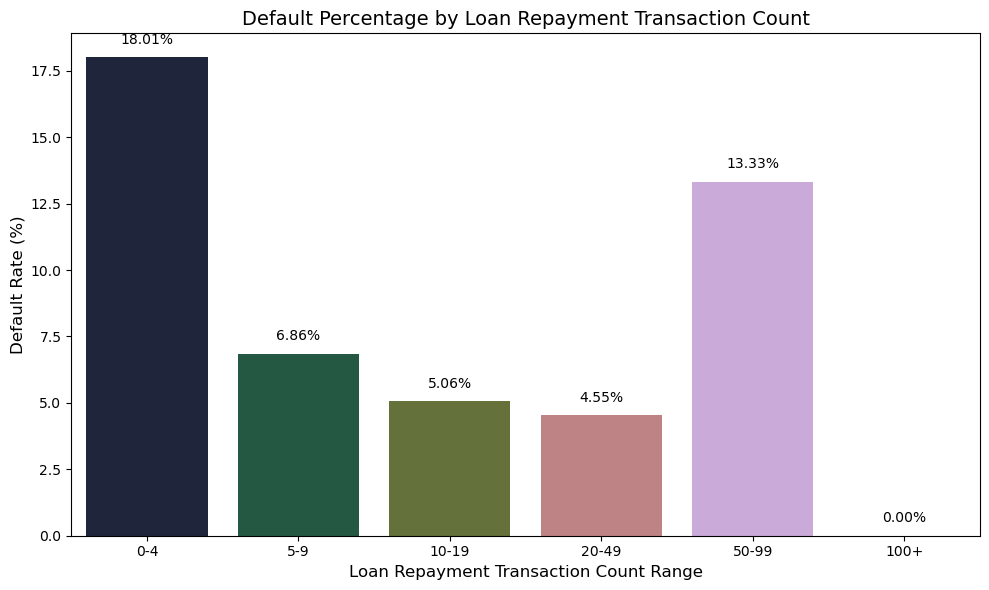

: 

In [ ]:
# Visualize the loan_repayment_txn_count against IsDefault using a bar plot in buckets
# Define bins and labels for loan repayment transaction counts
bins = [0, 5, 10, 20, 50, 100, 500]
labels = ['0-4', '5-9', '10-19', '20-49', '50-99', '100+']
# Create a new column for binned loan repayment transaction counts
df['LoanRepaymentTxnCountBin'] = pd.cut(df['loan_repayment_txn_count'], bins=bins, labels=labels, right=False)          
loan_repayment_defaults = df.groupby('LoanRepaymentTxnCountBin')['IsDefault'].mean().reset_index()
loan_repayment_defaults['Default Percentage'] = loan_repayment_defaults['IsDefault'] * 100
plt.figure(figsize=(10, 6))
sns.barplot(
    x='LoanRepaymentTxnCountBin', 
    y='Default Percentage', 
    data=loan_repayment_defaults, 
    palette='cubehelix'
)
plt.title('Default Percentage by Loan Repayment Transaction Count', fontsize=14)
plt.xlabel('Loan Repayment Transaction Count Range', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
# Add the actual percentage text above each bar
for index, value in enumerate(loan_repayment_defaults['Default Percentage']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

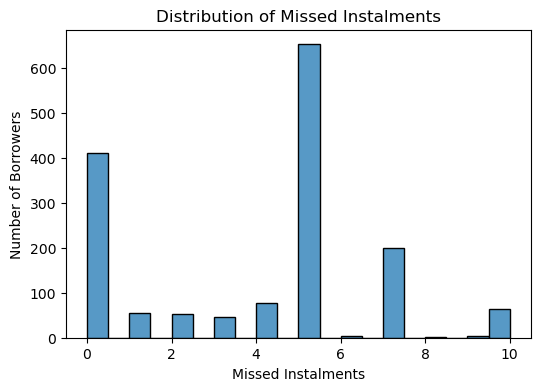

: 

In [ ]:
#Kunal
# Borrowers who miss instalments are more likely to default.
# Missed instalments are the strongest behavioural predictor of default.

plt.figure(figsize=(6,4))
sns.histplot(df['MissedInstalments'], bins=20)
plt.xlabel("Missed Instalments")
plt.ylabel("Number of Borrowers")
plt.title("Distribution of Missed Instalments")
plt.show()

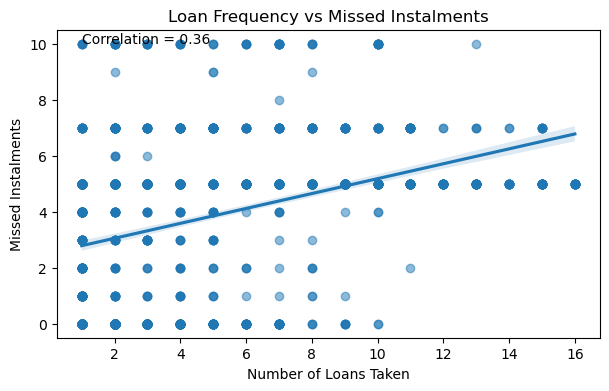

: 

In [ ]:
#Kunal
# If correlation is positive, frequent borrowers miss more instalments -> higher risk.
# If correlation is negative, frequent borrowers may be trusted repeat clients.
# Trendline shows the direction clearly.


# Step 1: Count loans per customer
loan_counts = df.groupby('CustomerId')['LoanId'].count().rename('LoanCount')

# Step 2: Merge back into main df
df_merged = df.merge(loan_counts, on='CustomerId')

# Step 3: Plot
plt.figure(figsize=(7,4))
sns.regplot(x='LoanCount', y='MissedInstalments',
            data=df_merged, scatter_kws={'alpha':0.5})
plt.xlabel("Number of Loans Taken")
plt.ylabel("Missed Instalments")
plt.title("Loan Frequency vs Missed Instalments")

corr = df_merged['LoanCount'].corr(df_merged['MissedInstalments'])
plt.text(df_merged['LoanCount'].min(),
         df_merged['MissedInstalments'].max(),
         f"Correlation = {corr:.2f}", fontsize=10)

plt.show()

# Hypothesis 08. Does a client's previous loan history significantly affect their likelihood of default?

Conclusion : 
1. Clients who fully cleared their previous loans show a higher default rate than those who had 1–5 missed installments.
2. Risk peaks for Cycle 3–4 clients, whereas the default rate drops significantly for those in Cycles 5–6.

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/2147900084.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = history_df.groupby('History_Group')['IsDefault'].mean() * 100
/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/2147900084.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette='RdYlGn_r') # Red to Green color map


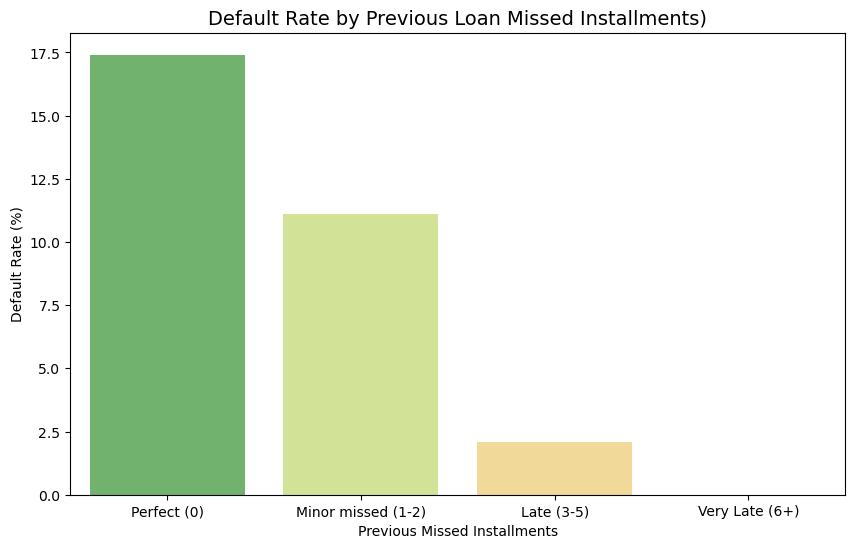

: 

In [ ]:
# James

# Sort by Customer and Date to ensure correct order
df = df.sort_values(by=['CustomerId', 'BorrowDate'])

# All loans are at least cycle 2 (the first loan is cycle 1, which we have removed during preprocessing)
# Calculate Loan Cycle (Cycle 2, 3, etc.)
df['Loan_Sequence'] = df.groupby('CustomerId').cumcount() + 2

# Look at the PREVIOUS loan's behavior for each customer
df['Prev_MissedInstalments'] = df.groupby('CustomerId')['MissedInstalments'].shift(1)
df['Prev_TxnCount'] = df.groupby('CustomerId')['loan_repayment_txn_count'].shift(1)

# We remove the first loan for each customer because they have no history to analyze
history_df = df.dropna(subset=['Prev_MissedInstalments', 'Prev_TxnCount']).copy()

# Visualize the relationship between previous missed installments and current default rate

plt.figure(figsize=(10, 6))

# Bin the missed installments into groups
# Groups of bins (perfect - no missed, minor missed, late, very late)
history_df['History_Group'] = pd.cut(history_df['Prev_MissedInstalments'], 
                                     bins=[-1, 0, 2, 5, 100], 
                                     labels=['Perfect (0)', 'Minor missed (1-2)', 'Late (3-5)', 'Very Late (6+)'])

# Calculate Default Rate per group
default_rates = history_df.groupby('History_Group')['IsDefault'].mean() * 100

# Plot
sns.barplot(x=default_rates.index, y=default_rates.values, palette='RdYlGn_r') # Red to Green color map
plt.title('Default Rate by Previous Loan Missed Installments)', fontsize=14)
plt.ylabel('Default Rate (%)')
plt.xlabel('Previous Missed Installments')
plt.show()

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/1029549691.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = history_df.pivot_table(index='Txn_Group', columns='History_Group', values='IsDefault', aggfunc='mean') * 100


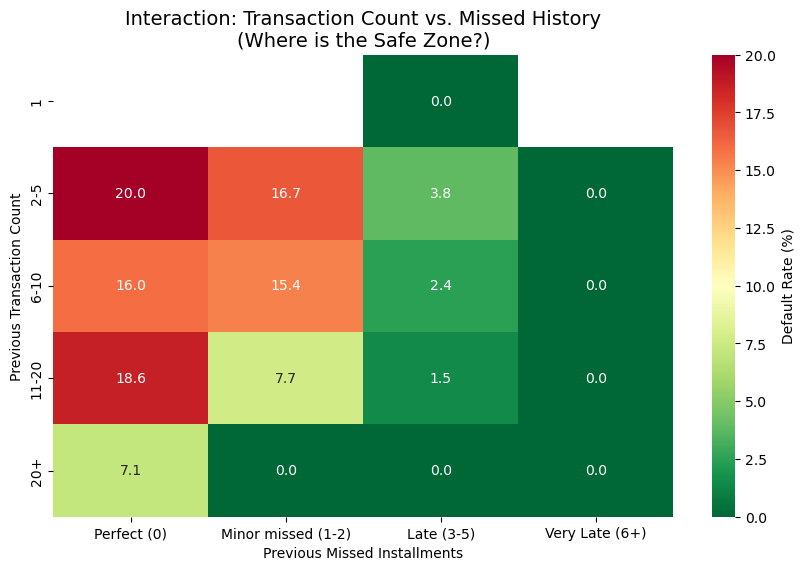

: 

In [ ]:
# Interaction: Transaction Count vs. Missed History Heatmap

# Bin Transaction Counts
history_df['Txn_Group'] = pd.cut(history_df['Prev_TxnCount'], 
                                 bins=[0, 1, 5, 10, 20, 100], 
                                 labels=['1', '2-5', '6-10', '11-20', '20+'])

# Create Pivot Table
pivot_table = history_df.pivot_table(index='Txn_Group', columns='History_Group', values='IsDefault', aggfunc='mean') * 100

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='RdYlGn_r', cbar_kws={'label': 'Default Rate (%)'})
plt.title('Interaction: Transaction Count vs. Missed History\n(Where is the Safe Zone?)', fontsize=14)
plt.ylabel('Previous Transaction Count')
plt.xlabel('Previous Missed Installments')
plt.show()

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/2711962718.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = history_df.pivot_table(index='Experience_Group', columns='History_Group', values='IsDefault', aggfunc='mean') * 100


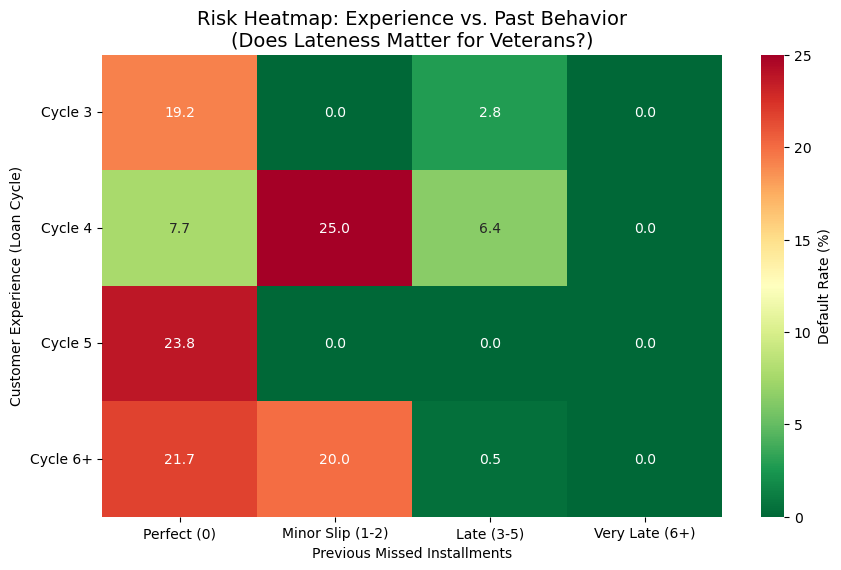

: 

In [ ]:
# Experience: Loan Cycle vs. Missed History Heatmap

# 4. Create Bins
# Behavior Bins
history_df['History_Group'] = pd.cut(history_df['Prev_MissedInstalments'], 
                                     bins=[-1, 0, 2, 5, 100], 
                                     labels=['Perfect (0)', 'Minor Slip (1-2)', 'Late (3-5)', 'Very Late (6+)'])

# Experience Bins (Loan Cycles)
history_df['Experience_Group'] = pd.cut(history_df['Loan_Sequence'], 
                                      bins=[1.9, 2.9, 3.9, 4.9, 5.9, 100], 
                                      labels=['Cycle 2', 'Cycle 3', 'Cycle 4', 'Cycle 5', 'Cycle 6+'])

# 5. Create Heatmap
pivot_table = history_df.pivot_table(index='Experience_Group', columns='History_Group', values='IsDefault', aggfunc='mean') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='RdYlGn_r', cbar_kws={'label': 'Default Rate (%)'})
plt.title('Risk Heatmap: Experience vs. Past Behavior\n(Does Lateness Matter for Veterans?)', fontsize=14)
plt.ylabel('Customer Experience (Loan Cycle)')
plt.xlabel('Previous Missed Installments')
plt.yticks(rotation=0)
plt.show()

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/619619442.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  late_risk = history_df[history_df['Is_Late']].groupby('Sequence_Group')['IsDefault'].mean() * 100


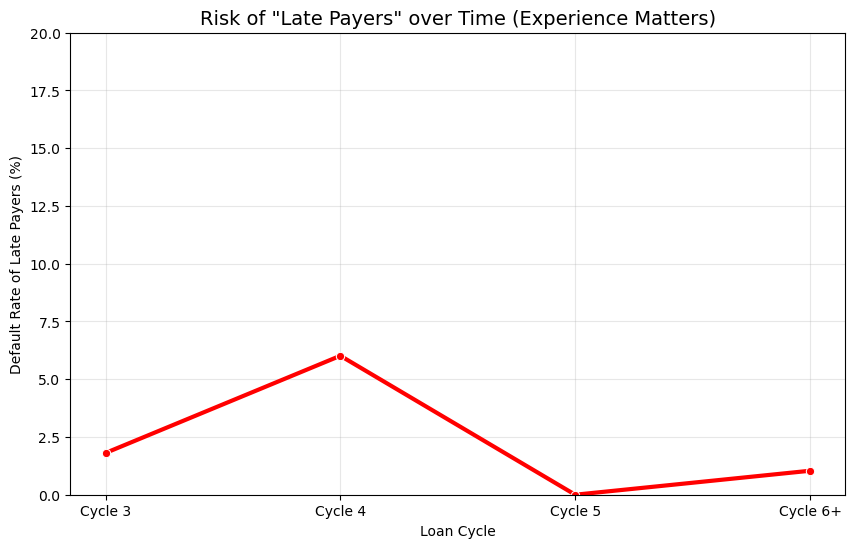

: 

In [ ]:
# Experience: Loan Cycle vs. Late Payers Line Plot
# Bin Loan Sequence
history_df['Sequence_Group'] = pd.cut(history_df['Loan_Sequence'], 
                                      bins=[1.9, 2.9, 3.9, 4.9, 5.9, 100], 
                                      labels=['Cycle 2', 'Cycle 3', 'Cycle 4', 'Cycle 5', 'Cycle 6+'])

# Flag Late Payers
history_df['Is_Late'] = history_df['Prev_MissedInstalments'] > 0

# Calculate Risk ONLY for Late Payers
late_risk = history_df[history_df['Is_Late']].groupby('Sequence_Group')['IsDefault'].mean() * 100

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=late_risk.index, y=late_risk.values, marker='o', color='red', linewidth=3)
plt.title('Risk of "Late Payers" over Time (Experience Matters)', fontsize=14)
plt.ylabel('Default Rate of Late Payers (%)')
plt.xlabel('Loan Cycle')
plt.ylim(0, 20) # Set limit to see the drop clearly
plt.grid(True, alpha=0.3)
plt.show()

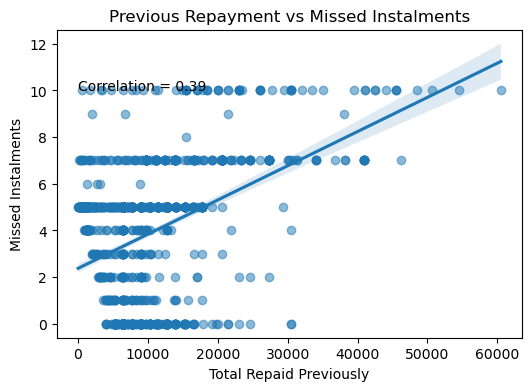

: 

In [ ]:
#Kunal
# Borrowers with poor repayment history are more likely to default again.
# Repayment behaviour is highly predictive of future performance.

plt.figure(figsize=(6,4))
sns.regplot(x='loan_repayment_total_paid', y='MissedInstalments', data=df, scatter_kws={'alpha':0.5})
plt.xlabel("Total Repaid Previously")
plt.ylabel("Missed Instalments")
plt.title("Previous Repayment vs Missed Instalments")

corr = df['loan_repayment_total_paid'].corr(df['MissedInstalments'])
plt.text(df['loan_repayment_total_paid'].min(), df['MissedInstalments'].max(), f"Correlation = {corr:.2f}")

plt.show()

# Hypothesis 09. Do Late Payers have higher capacity?

Conclusion : Most of clients make late payment than perfect weekly payment. cliente who has higher Loan limite tend to make late payment.

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/1787084686.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payer_Style', y='LoanLimit', data=history_df, palette='Set2')


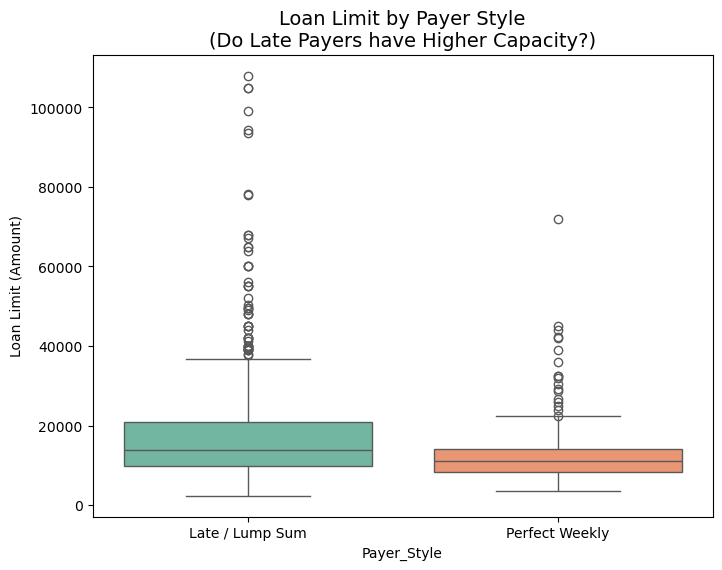

: 

In [ ]:
# James

# Capacity: Loan Limit vs. Payer Style Box Plot

# Define Payer Style
history_df['Payer_Style'] = history_df['Prev_MissedInstalments'].apply(lambda x: 'Late / Lump Sum' if x > 0 else 'Perfect Weekly')

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Payer_Style', y='LoanLimit', data=history_df, palette='Set2')
plt.title('Loan Limit by Payer Style\n(Do Late Payers have Higher Capacity?)', fontsize=14)
plt.ylabel('Loan Limit (Amount)')
plt.show()

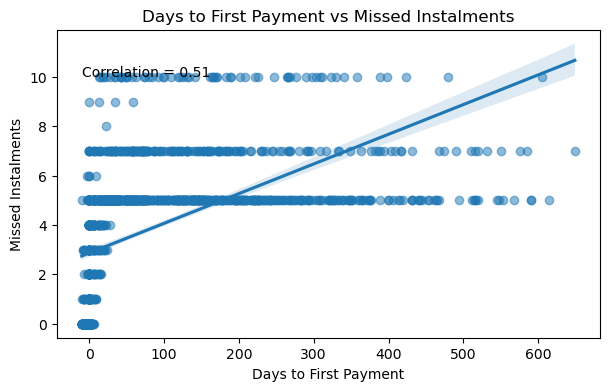

: 

In [ ]:
#Kunal
# Borrowers who delay first payment may be managing cash flow strategically.
# Days to first payment reflects:
# - Liquidity
# - Cash flow stability
# - Repayment discipline
# If correlation is positive, late payers miss more instalments -> lower capacity.
# If correlation is negative, late payers may actually be more disciplined.
# Trendline helps interpret the relationship.

plt.figure(figsize=(7,4))
sns.regplot(x='days_to_first', y='MissedInstalments',
            data=df, scatter_kws={'alpha':0.5})
plt.xlabel("Days to First Payment")
plt.ylabel("Missed Instalments")
plt.title("Days to First Payment vs Missed Instalments")


corr = df['days_to_first'].corr(df['MissedInstalments'])
plt.text(df['days_to_first'].min(),
         df['MissedInstalments'].max(),
         f"Correlation = {corr:.2f}", fontsize=10)

plt.show()

# Hypothesis 10. Does business type impact to make defaulty?

Conclusion : 
1. Top 25% clients who has high credit score but has many missed instalments tend to borrow big amount of loan than others customers.
2. Agriculture, green grocery business owener has higher risk to make defaulty (but cannot generalized)

High credit score but missed instalments clients: 503


/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/1474997351.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_risk_prime, y='BusinessType',


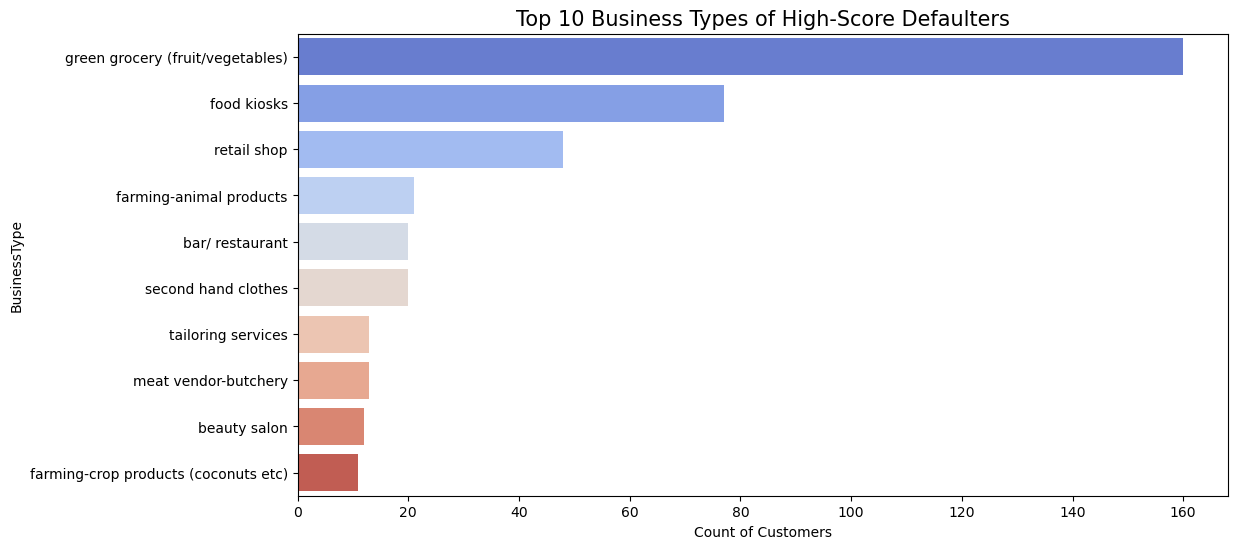

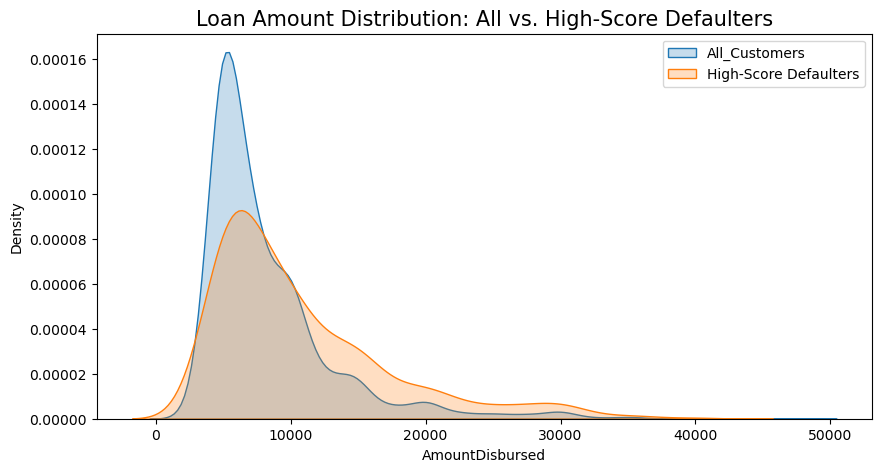

: 

In [ ]:
# Sumin

# High Credit Score but High Missed Instalments Analysis
high_score_threshold = df['CreditScore'].quantile(0.75)  # Top 25% credit score
high_missed_threshold = df['MissedInstalments'].mean()   # Average missed instalments

high_risk_prime = df[(df['CreditScore'] >= high_score_threshold) & 
                     (df['MissedInstalments'] > high_missed_threshold)].copy()

print(f"High credit score but missed instalments clients: {len(high_risk_prime)}")

# Visualization their business types
plt.figure(figsize=(12, 6))
sns.countplot(data=high_risk_prime, y='BusinessType', 
              order=high_risk_prime['BusinessType'].value_counts().iloc[:10].index,
              palette='coolwarm')

plt.title('Top 10 Business Types of High-Score Defaulters', fontsize=15)
plt.xlabel('Count of Customers')
plt.show()

# Visualization: Loan Amount Distribution - All vs. High-Score Defaulters
plt.figure(figsize=(10, 5))
sns.kdeplot(df['AmountDisbursed'], label='All_Customers', fill=True)
sns.kdeplot(high_risk_prime['AmountDisbursed'], label='High-Score Defaulters', fill=True)

plt.title('Loan Amount Distribution: All vs. High-Score Defaulters', fontsize=15)
plt.legend()
plt.show()

--- Industry Summary Statistics ---
                                  Avg_Loan_Amount  Avg_Repayment_Days  \
Industry                                                                
education                            20000.000000           77.500000   
transportation                       10119.047619           54.404762   
wholesale & retail trade              9324.324324           36.918919   
manufacturing                         9285.714286           36.142857   
fashion & beauty products             8923.566879           43.184713   
agriculture                           8369.230769           45.892308   
food & hospitality                    8288.190683           43.643554   
automobile services                   8222.222222           23.333333   
business & information                8142.857143           53.285714   
natural resources/environmental       7837.837838           34.837838   
agriculture, forestry & fishing       7814.814815           37.370370   
real estate & h

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/492462781.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Industry', y='RepaymentDuration', palette='viridis', errorbar=None)


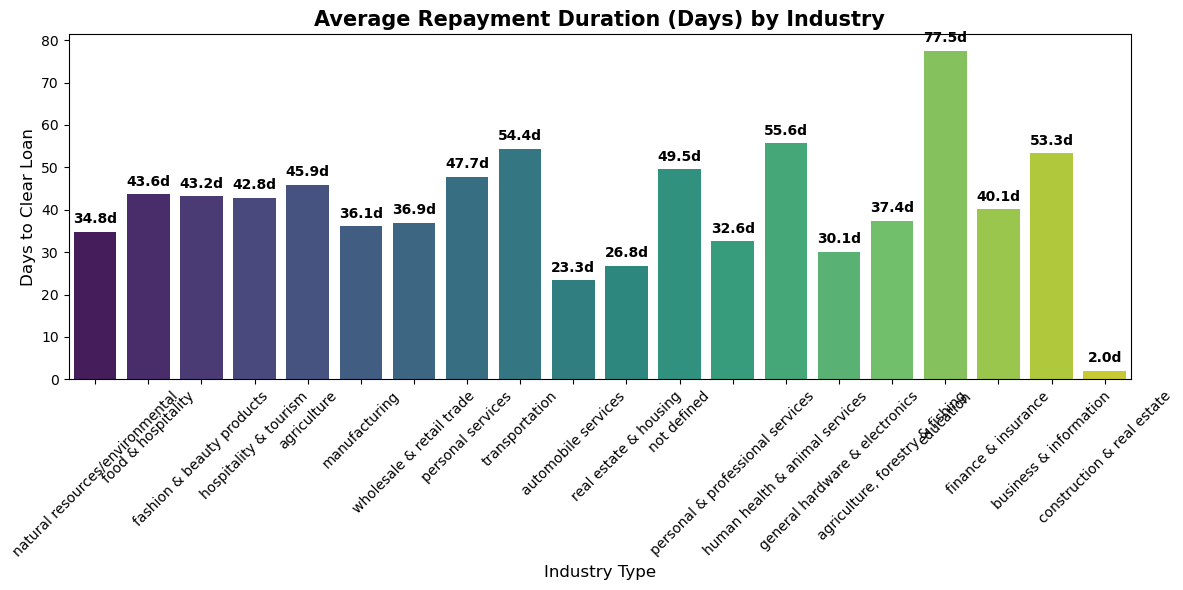

: 

In [ ]:
# 1. Feature Engineering: Calculating Repayment Duration
# Converting to datetime to ensure accurate calculation
df['BorrowDate'] = pd.to_datetime(df['BorrowDate'])
df['ClearDate'] = pd.to_datetime(df['ClearDate'])

# Repayment duration in days
df['RepaymentDuration'] = (df['ClearDate'] - df['BorrowDate']).dt.days

# 2. Aggregating Statistics by Industry
# We analyze the average loan size, repayment speed, and total volume
industry_summary = df.groupby('Industry').agg({
    'AmountDisbursed': 'mean',
    'RepaymentDuration': 'mean',
    'LoanId': 'count'
}).rename(columns={
    'AmountDisbursed': 'Avg_Loan_Amount',
    'RepaymentDuration': 'Avg_Repayment_Days',
    'LoanId': 'Total_Loan_Count'
}).sort_values(by='Avg_Loan_Amount', ascending=False)

print("--- Industry Summary Statistics ---")
print(industry_summary)

# 3. Visualization: Average Repayment Duration by Industry
# Bar chart to compare how long each industry takes to clear their debt
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='Industry', y='RepaymentDuration', palette='viridis', errorbar=None)

# Adding value labels on top of the bars for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}d', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), 
                textcoords='offset points', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.title('Average Repayment Duration (Days) by Industry', fontsize=15, fontweight='bold')
plt.xlabel('Industry Type', fontsize=12)
plt.ylabel('Days to Clear Loan', fontsize=12)

plt.tight_layout()
plt.show()

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/3401517482.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=business_analysis.head(10), x='Default_Clients', y='BusinessType', palette='magma')


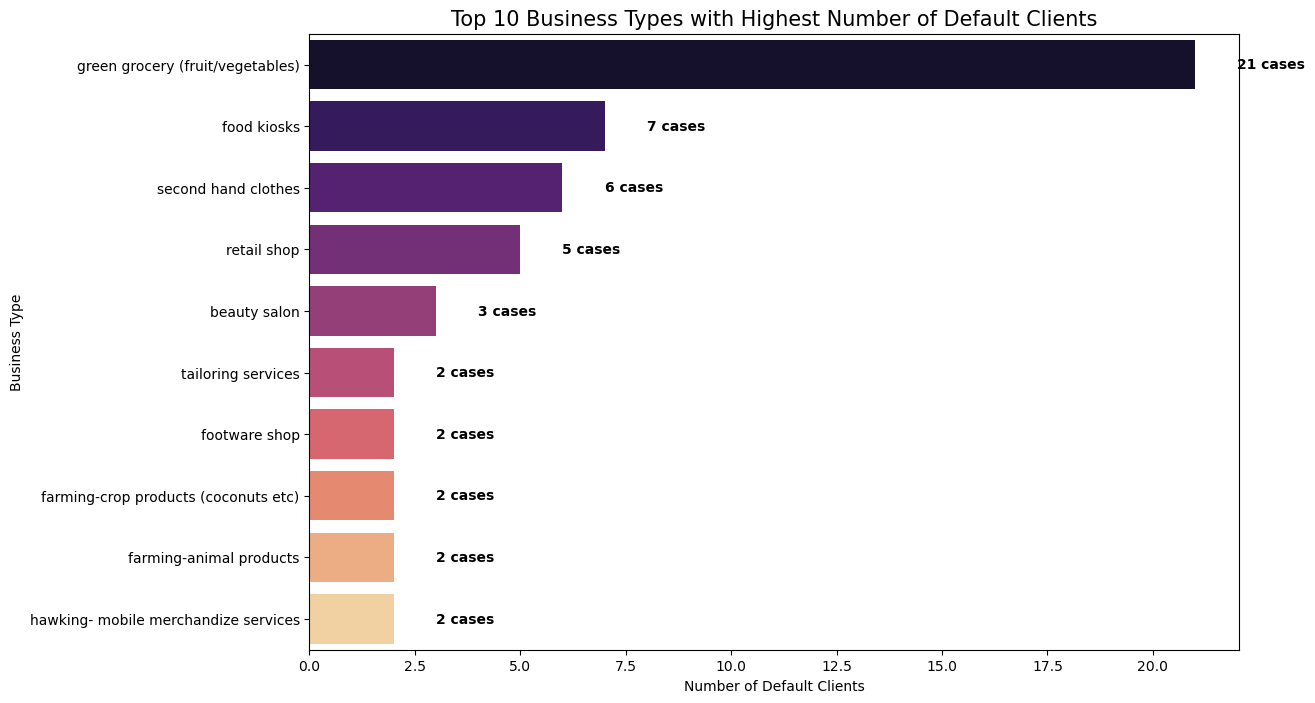

                            BusinessType  Total_Clients  Default_Clients  \
22      green grocery (fruit/vegetables)            492               21   
20                           food kiosks            212                7   
42                   second hand clothes             72                6   
40                           retail shop            139                5   
5                           beauty salon             41                3   
43                    tailoring services             33                2   
21                         footware shop             19                2   
18  farming-crop products (coconuts etc)             30                2   
17               farming-animal products             58                2   
23  hawking- mobile merchandize services             22                2   

    Default_Rate_%  
22        4.268293  
20        3.301887  
42        8.333333  
40        3.597122  
5         7.317073  
43        6.060606  
21       10.5263

: 

In [ ]:
# 1. Assuming 'Default' column is already created by your teammate
# If not, we use the logic: (df['ClearDate'] > '2025-12-15') & (df['LoanBalance'] > 0)
if 'Default' not in df.columns:
    df['Default'] = ((df['ClearDate'] > '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)

# 2. Group by BusinessType to get total and default counts
business_analysis = df.groupby('BusinessType').agg(
    Total_Clients=('LoanId', 'count'),
    Default_Clients=('Default', 'sum')
).reset_index()

# 3. Calculate Default Rate (%) for better context
business_analysis['Default_Rate_%'] = (business_analysis['Default_Clients'] / business_analysis['Total_Clients']) * 100
business_analysis = business_analysis.sort_values(by='Default_Clients', ascending=False)

# 4. Visualize the top 10 Business Types with most Defaulters
plt.figure(figsize=(12, 8))
sns.barplot(data=business_analysis.head(10), x='Default_Clients', y='BusinessType', palette='magma')

# Add value labels
for i, val in enumerate(business_analysis.head(10)['Default_Clients']):
    plt.text(val + 1, i, f'{int(val)} cases', va='center', fontweight='bold')

plt.title('Top 10 Business Types with Highest Number of Default Clients', fontsize=15)
plt.xlabel('Number of Default Clients')
plt.ylabel('Business Type')
plt.show()

# Display the table
print(business_analysis[['BusinessType', 'Total_Clients', 'Default_Clients', 'Default_Rate_%']].head(10))

In [ ]:
#Kunal

# The table is sorted from highest to lowest missed instalments.
# Business types at the top show higher repayment stress.
# This helps identify riskier industries for microfinance lending and portfolio management.


business_table = (
    df.groupby('BusinessType')['MissedInstalments']
      .mean()
      .reset_index()
      .rename(columns={
          'BusinessType': 'Business Type',
          'MissedInstalments': 'Average Missed Instalments'
      })
      .sort_values(by='Average Missed Instalments', ascending=False)
      .reset_index(drop=True)
)

business_table

,Business Type,Average Missed Instalments
0,oil & gas distribution,7.000000
1,water vending,6.500000
2,private school,5.250000
3,household utensils,5.000000
4,contractor/plumbing & interior design,5.000000
5,taxi & rental services,5.000000
6,lawn care services,5.000000
7,farming-animal products,4.431034
8,agro-vet,4.400000
9,beverage manufacturing- juice etc,4.400000


: 

# Hypothesis 11 — Clients With Higher Loan Balance Are More Likely to Default
A high LoanBalance means the borrower still owes a large amount.
This can indicate:
- repayment difficulty
- poor cash flow
- delayed instalments
- risk of future default
Microfinance institutions often monitor outstanding balance as a key risk indicator

Conclusion : If defaulters have higher remaining balances, the hypothesis is supported. If balances are similar, loan balance may not be a strong predictor.

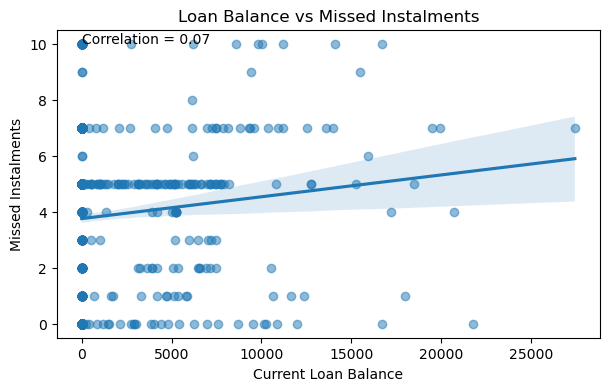

: 

In [ ]:
#Kunal
# A positive correlation supports the hypothesis: higher remaining balance -> more missed instalments.
# Trendline shows whether the relationship is strong or weak.

plt.figure(figsize=(7,4))
sns.regplot(x='LoanBalance', y='MissedInstalments',
            data=df, scatter_kws={'alpha':0.5})
plt.xlabel("Current Loan Balance")
plt.ylabel("Missed Instalments")
plt.title("Loan Balance vs Missed Instalments")

corr = df['LoanBalance'].corr(df['MissedInstalments'])
plt.text(df['LoanBalance'].min(),
         df['MissedInstalments'].max(),
         f"Correlation = {corr:.2f}", fontsize=10)

plt.show()

/var/folders/8q/fl3wttwd7c7d86ktpbtwn_0m0000gn/T/ipykernel_68986/802095256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_active['DefaultRate'] = (df_not_active['MissedInstalments'] > 0).astype(int)


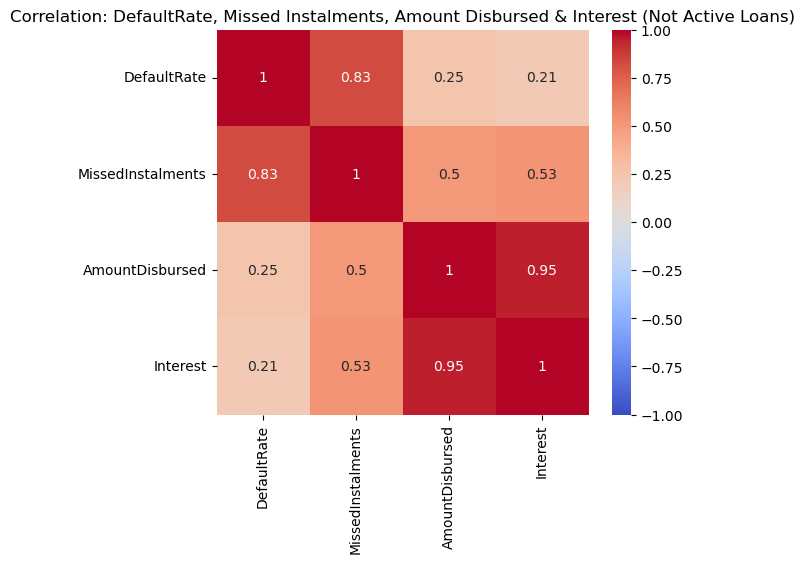

: 

In [ ]:
#Correlation on the call
cutoff = pd.to_datetime("2025-12-15")
df_not_active = df[df['ClearDate'] < cutoff]
df_not_active['DefaultRate'] = (df_not_active['MissedInstalments'] > 0).astype(int)

corr_features = df_not_active[['DefaultRate', 'MissedInstalments', 'AmountDisbursed', 'Interest']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_features, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: DefaultRate, Missed Instalments, Amount Disbursed & Interest (Not Active Loans)")
plt.show()

# Feature Engineering

In [ ]:
# 1. Risk profile by Branch & Business type - High correlation to default (0.33 correlation rate)

df['IsDefault'] = ((df['ClearDate'] < '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)
branch_biz_risk = df.groupby(['Branch', 'BusinessType'])['IsDefault'].transform('mean')
df['Branch_Biz_Risk_Score'] = branch_biz_risk

# 2. Rate of loan utilized against the limit - Moderate correlation to default (0.13 correlation rate), good to predict how much client borrow verse their Loan limit
df['Loan_Utilization'] = df['AmountDisbursed'] / df['LoanLimit']

# 3. Gender & Branch - Use Binary Encoding (0 or 1) - AI models only read numbers. Encoding converts words into digits for mathematical processing
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})
df['Branch'] = df['Branch'].map({'engineer': 1, 'molo': 0})

# 4. BusinessType - Use Frequency Encoding - To simplify complexity. ( 50 different business types can be kept in one single column). Also, It captures business prevalence, helping AI link a sector's market density to its specific risk.
business_type_freq = df['BusinessType'].value_counts(normalize=True)
df['BusinessType'] = df['BusinessType'].map(business_type_freq)

# 5. Repayment engagement -  How actively a customer is repaying their loan over time. Tells us who is paying regularly vs. dragging payments (3 payments in 10 days and 3 payments in 60 days)
df["Txn_Intensity"] = df["loan_repayment_txn_count"] / (df["RepaymentDuration"] + 1)

# 6. Missed Rate - How unreliable a customer is relative to how often they repay.
df["Missed_Rate"] = df["MissedInstalments"] / (df["loan_repayment_txn_count"] + 1)

# 7. Repayment coverage - How much of the disbursed loan has been repaid so far.
df["Repayment_Coverage"] = df["loan_repayment_total_paid"]/(df["AmountDisbursed"] + 1)

# 8. Loan term  - Actual loan duration
df['loan_term_days'] = (df['ClearDate'] - df['BorrowDate']).dt.days

# 9. Balance ratios - Remaining balance vs limit and Remaining balance vs principal
df['balance_to_limit'] = df['LoanBalance'] / df['LoanLimit'].replace(0, np.nan)
df['balance_to_disbursed'] = df['LoanBalance'] / df['AmountDisbursed'].replace(0, np.nan)

# 10. Overpayment ratio - Extra payments
df['overpayment_ratio'] = df['loan_overpayment'] / df['AmountDisbursed'].replace(0, np.nan)

# 11. Seasonality - Month of borrowing (Is December riskier?) - Check if there is any correlation between month of loan taken and ultimate loan default
df['BorrowMonth'] = df['BorrowDate'].dt.month

# 12. Sequence: 1st loan, 2nd loan, etc - Feel free to add extra features or structure
df['Loan_Sequence'] = df.groupby('CustomerId').cumcount() + 1

# 13. Previous Missed Payments - Feel free to add extra features or structure
df['Prev_MissedInstalments'] = df.groupby('CustomerId')['MissedInstalments'].shift(1)

# 14. Experienced delinquent customers" Indicator: High Experience and History of Missed Payments
# (Sequence > 5) AND (Prev_Missed > 0)
df['experienced_delinquent'] = ((df['Loan_Sequence'] > 5) & (df['Prev_MissedInstalments'] > 0)).astype(int)

# 15. Financial stress (After how many missed installments is the customer a potential risk?) - The heat map shows low relevance as it is behavioral feature (depends on a threshold value). However, in real world afer missing a certain number of repayments the customer should be listed as risky.
df['Financial_Stress'] = (df['MissedInstalments'] > 3).astype(int)


df.head(10)


,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished,days_to_first,Product_Code,Branch_Code,ScoreRange,IsDefault,LoanAmountBin,LoanRepaymentTxnCountBin,Loan_Sequence,Prev_MissedInstalments,Prev_TxnCount,RepaymentDuration,Default,Branch_Biz_Risk_Score,Loan_Utilization,Txn_Intensity,Missed_Rate,Repayment_Coverage,loan_term_days,balance_to_limit,balance_to_disbursed,overpayment_ratio,BorrowMonth,experienced_delinquent,Financial_Stress
2576,646265,10000,2750,0.0,2024-02-13,5 weeks credit ease,0,2024-12-02,23,1,17500.0,1800,13,12750,2025-04-30,2025-08-20,0,5.0,natural resources/environmental,0.023003,2022,442,1,1,2k,0,10k-15k,10-19,1,NaN,NaN,293,0,0.033333,0.571429,0.044218,0.357143,1.274873,293,0.0,0.0,0.0,2,0,1
124,720868,10000,3850,0.0,2024-05-09,7 weeks credit ease,0,2024-05-09,23,1,10000.0,2000,1,264,2025-08-20,2025-08-20,0,7.0,food & hospitality,0.314377,2012,468,2,1,2.5k,0,10k-15k,0-4,2,5.0,13.0,0,0,0.051075,1.000000,1.000000,3.500000,0.026397,0,0.0,0.0,0.0,5,0,1
521,650669,6000,1750,0.0,2024-02-19,5 weeks credit ease,0,2024-02-22,90,1,15000.0,2000,4,7750,2025-08-25,2025-09-09,0,5.0,food & hospitality,0.314377,2019,553,1,1,2.5k,0,5k-10k,0-4,1,NaN,NaN,3,0,0.051075,0.400000,1.000000,1.000000,1.291451,3,0.0,0.0,0.0,2,0,1
2005,705587,5000,1500,0.0,2024-07-16,5 weeks credit ease,0,2024-07-16,90,1,7900.0,2000,9,6500,2025-09-20,2025-10-09,0,5.0,fashion & beauty products,0.046006,2019,431,1,1,2.5k,0,5k-10k,5-9,2,5.0,4.0,0,0,0.040000,0.632911,9.000000,0.500000,1.299740,0,0.0,0.0,0.0,7,0,1
2192,720456,10000,2750,0.0,2024-08-20,5 weeks credit ease,0,2024-08-21,90,1,11400.0,2500,10,12750,2025-10-09,2025-11-17,0,5.0,fashion & beauty products,0.046006,2019,415,1,1,3k,0,10k-15k,10-19,3,5.0,9.0,1,0,0.040000,0.877193,5.000000,0.454545,1.274873,1,0.0,0.0,0.0,8,0,1
231,768510,10000,2750,0.0,2024-09-12,5 weeks credit ease,0,2024-12-16,90,1,20000.0,2000,2,2573,2025-11-17,2025-11-25,0,5.0,food & hospitality,0.314377,2018,431,1,1,2.5k,0,10k-15k,0-4,4,5.0,10.0,95,0,0.051075,0.500000,0.020833,1.666667,0.257274,95,0.0,0.0,0.0,9,0,1
344,892199,4000,1250,0.0,2025-09-17,5 weeks credit ease,0,2025-09-23,156,0,8000.0,2000,3,3700,2025-10-03,2025-10-22,0,5.0,hospitality & tourism,0.005751,2019,16,1,1,2.5k,0,0-5k,0-4,1,NaN,NaN,6,0,0.000000,0.500000,0.428571,1.250000,0.924769,6,0.0,0.0,0.0,9,0,1
2338,657768,5000,1500,0.0,2024-09-03,5 weeks credit ease,0,2024-12-03,180,1,7100.0,2500,11,6500,2025-06-12,2025-07-11,0,5.0,agriculture,0.314377,2013,282,1,1,3k,0,5k-10k,10-19,1,NaN,NaN,91,0,0.051075,0.704225,0.119565,0.416667,1.299740,91,0.0,0.0,0.0,9,0,1
2575,836666,5000,1500,0.0,2025-04-06,5 weeks credit ease,0,2025-10-06,180,0,6700.0,2000,13,4471,2025-08-06,2025-09-05,0,5.0,food & hospitality,0.314377,2019,122,1,1,2.5k,0,5k-10k,10-19,2,5.0,11.0,183,0,0.051075,0.746269,0.070652,0.357143,0.894021,183,0.0,0.0,0.0,4,0,1
1523,641972,15000,8000,0.0,2024-02-20,10 weeks credit ease,0,2024-06-03,295,0,33000.0,7000,7,23000,2024-05-28,2024-06-25,0,10.0,agriculture,0.037061,2013,98,0,1,7.5k,0,15k-20k,5-9,1,NaN,NaN,104,0,0.043478,0.454545,0.066667,1.250000,1.533231,104,0.0,0.0,0.0,2,0,1


: 

In [ ]:
for col in df.columns:
    print(col)


LoanId
AmountDisbursed
Interest
LoanBalance
BorrowDate
Product
Branch
ClearDate
CustomerId
Gender
LoanLimit
CreditScore
loan_repayment_txn_count
loan_repayment_total_paid
loan_repayment_first_payment
loan_repayment_last_payment
loan_overpayment
MissedInstalments
Industry
BusinessType
YearEstablished
days_to_first
Product_Code
Branch_Code
ScoreRange
IsDefault
LoanAmountBin
LoanRepaymentTxnCountBin
Loan_Sequence
Prev_MissedInstalments
Prev_TxnCount
RepaymentDuration
Default
Branch_Biz_Risk_Score
Loan_Utilization
Txn_Intensity
Missed_Rate
Repayment_Coverage
loan_term_days
balance_to_limit
balance_to_disbursed
overpayment_ratio
BorrowMonth
experienced_delinquent
Financial_Stress


: 

In [ ]:
CUTOFF_DATE = pd.Timestamp("2025-12-15")

: 

In [ ]:
# More feature engineering
# Calculate days since disbursement and remaining contract days
df["days_since_disbursement"] = (CUTOFF_DATE - df["BorrowDate"]).dt.days
df["remaining_contract_days"] = df["loan_term_days"] - df["days_since_disbursement"]

df["remaining_contract_ratio"] = (
    df["remaining_contract_days"] / df["loan_term_days"]
).clip(lower=0)

: 

In [ ]:
# Data selection for modeling

# Variables to be used for modeling
TARGET = "IsDefault"          
DATE_COL = "BorrowDate"       
CUTOFF_EXCLUDE = "2025-12-01" 

# Numerical features
NUM_FEATURES = [
    "AmountDisbursed",
    "Interest",
    "LoanLimit",
    "loan_term_days",
    "days_since_disbursement",
    "remaining_contract_days",
    "remaining_contract_ratio",
    "Loan_Sequence",
    "log_loan_experience",
    "first_loan_amount",
    "loan_growth_from_first",
    "business_age",
    "Loan_Utilization"
]

# Categorical features
CAT_FEATURES = [
    "Product_Code",
    "Branch_Code",
    "Gender",
    "Industry",
    "BusinessType",
    "BorrowMonth",
]

# Dropping Leakage Features
DROP_ALWAYS = [
    # identifiers
    "LoanId", "CustomerId",

    # target duplicates
    "Default",

    # direct leakage 
    "LoanBalance", "ClearDate",
    "balance_to_limit", "balance_to_disbursed",
    "Financial_Stress",

    # repayment behaviour 
    "loan_repayment_txn_count", "loan_repayment_total_paid",
    "loan_repayment_first_payment", "loan_repayment_last_payment",
    "loan_overpayment", "overpayment_ratio",
    "MissedInstalments", "days_to_first",
    "LoanRepaymentTxnCountBin", "RepaymentDuration",
    "Prev_MissedInstalments", "Prev_TxnCount",
    "Txn_Intensity", "Missed_Rate", "Repayment_Coverage",
    "experienced_delinquent",

    # text duplicates 
    "Product", "Branch",

    # engineered leakage
    "Branch_Biz_Risk_Score",
    "ScoreRange",
]

# keep only those that exist
# Keep only columns that exist
DROP_ALWAYS = [c for c in DROP_ALWAYS if c in df.columns]

# model dataframe building
df_model = df.copy()

# Ensure BorrowDate is datetime (needed later for time split)
df_model[DATE_COL] = pd.to_datetime(df_model[DATE_COL], errors="coerce")

# Drop rows missing date or target
df_model = df_model.dropna(subset=[DATE_COL, TARGET]).copy()

# Remove leaky columns first (safety)
df_model = df_model.drop(columns=DROP_ALWAYS, errors="ignore")

# Keep only approved features that exist + date + target
NUM_FEATURES = [c for c in NUM_FEATURES if c in df_model.columns]
CAT_FEATURES = [c for c in CAT_FEATURES if c in df_model.columns]
FEATURES = NUM_FEATURES + CAT_FEATURES

keep_cols = [DATE_COL, TARGET] + FEATURES
df_model = df_model[keep_cols].copy()

# Final X/y ready (but not split yet)
X = df_model[FEATURES].copy()
y = df_model[TARGET].astype(int).copy()

print("Finalised feature count:", len(FEATURES))
print("X shape:", X.shape, "| y default rate:", y.mean().round(4))
print("\nNumeric features:", NUM_FEATURES)
print("Categorical features:", CAT_FEATURES)




Finalised feature count: 15
X shape: (1564, 15) | y default rate: 0.085

Numeric features: ['AmountDisbursed', 'Interest', 'LoanLimit', 'loan_term_days', 'days_since_disbursement', 'remaining_contract_days', 'remaining_contract_ratio', 'Loan_Sequence', 'Loan_Utilization']
Categorical features: ['Product_Code', 'Branch_Code', 'Gender', 'Industry', 'BusinessType', 'BorrowMonth']


: 

In [ ]:
DATE_COL = "BorrowDate"

# Ensure datetime
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")

: 

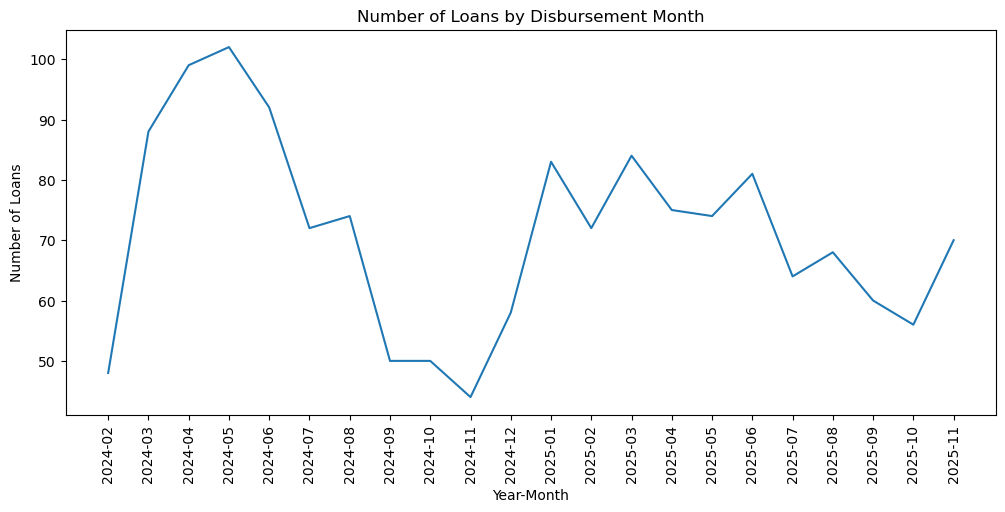

: 

In [ ]:
by_month = (
    df.dropna(subset=[DATE_COL])[DATE_COL]
      .dt.to_period("M")
      .value_counts()
      .sort_index()
)

plt.figure(figsize=(12, 5))
plt.plot(by_month.index.astype(str), by_month.values)
plt.title("Number of Loans by Disbursement Month")
plt.xlabel("Year-Month")
plt.ylabel("Number of Loans")
plt.xticks(rotation=90)
plt.show()

#print(by_month.tail(24))

In [184]:
# 1. Update Categorical Feature Handling
# Identify columns that are strings/objects
categorical_to_encode = ["Industry", "Product_Code", "Branch_Code"] # Add others if needed
# Ensure these exist in your CAT_FEATURES list
CAT_FEATURES = [c for c in CAT_FEATURES if c in df_model.columns]

# 2. Encode the features
# This converts 'Industry' into multiple columns (e.g., Industry_Agriculture, Industry_Resources)
X_encoded = pd.get_dummies(df_model[FEATURES], columns=[c for c in categorical_to_encode if c in FEATURES], drop_first=True)
y = df_model[TARGET].astype(int)

# 3. Re-run the Split using the encoded data
# Attach Date for the time-based split
df_encoded = X_encoded.copy()
df_encoded[DATE_COL] = df_model[DATE_COL]
df_encoded[TARGET] = y

### Splitting by Date

#### Training: 
Feb 2024 to Feb 2025 (~65%)

#### Validation: 
Mar 2025 to May 2025 (~15%)

#### Testing:
Jun 2025 to Nov 2025 (~20%)

In [185]:
# Exclude incomplete last month (Dec 2025)
df = df[df["BorrowDate"] < "2025-12-01"].copy()

# Option B splits
train_df = df[df["BorrowDate"] < "2025-03-01"].copy()  # up to end of Feb 2025
val_df   = df[(df["BorrowDate"] >= "2025-03-01") & (df["BorrowDate"] < "2025-06-01")].copy()
test_df  = df[(df["BorrowDate"] >= "2025-06-01") & (df["BorrowDate"] < "2025-12-01")].copy()

print("Train:", train_df.shape, " | months:", train_df["BorrowDate"].dt.to_period("M").nunique())
print("Val:  ", val_df.shape,   " | months:", val_df["BorrowDate"].dt.to_period("M").nunique())
print("Test: ", test_df.shape,  " | months:", test_df["BorrowDate"].dt.to_period("M").nunique())

# If you've already built X (features) and y (target) earlier:
X_train, y_train = train_df[X.columns], train_df[y.name]
X_val, y_val     = val_df[X.columns],   val_df[y.name]
X_test, y_test   = test_df[X.columns],  test_df[y.name]

print("Default rates ->",
      "train:", y_train.mean().round(4),
      "val:", y_val.mean().round(4),
      "testa:", y_test.mean().round(4))

Train: (932, 48)  | months: 13
Val:   (233, 48)  | months: 3
Test:  (399, 48)  | months: 6
Default rates -> train: 0.0612 val: 0.1159 testa: 0.1228


In [186]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, NUM_FEATURES),
        ("cat", categorical_transformer, CAT_FEATURES)
    ]
)


In [187]:
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, precision_recall_curve, auc, f1_score, recall_score)
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# 4. TRAIN MODELS
# Scenario A: Naive Model
model_naive = LogisticRegression(max_iter=1000)
model_naive.fit(X_train, y_train)


ValueError: could not convert string to float: 'natural resources/environmental'

In [ ]:

# Scenario B: Class Weights
model_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
model_weighted.fit(X_train, y_train)

# Scenario C: SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# 5. EVALUATION AND PROOF
models = {
    "Naive (Unadjusted)": model_naive,
    "Class Weighted": model_weighted,
    "SMOTE + Random Forest": model_smote
}

results = []
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate Metrics
    acc = model.score(X_test, y_test)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    results.append({"Model": name, "Accuracy": acc, "Recall": rec, "F1-Score": f1, "AUC-ROC": roc})
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f"{name}\nAcc: {acc:.2f} | F1: {f1:.2f}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.savefig('imbalance_proof.png')

# Print Results Table
results_df = pd.DataFrame(results)
print("\n--- PERFORMANCE COMPARISON ---")
print(results_df.to_string(index=False))

: 